# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

План работ:
1. Изучить общую информацию о файле


2. Провести предобработку данных (заполнить пропуски, поправить типы данных, устранить дубликаты, устранить выбросы)


3. Рассчитать показатели, на основе которых будет проведен исследовательский анализ данных


4. Провести исследовательский анализ параметров выгрузки


5. Выполнить набор заданий для исследовательского анализа данных:
* Изучите, как быстро продавались квартиры
* Изучить, какие факторы больше всего влияют на общую (полную) стоимость объекта
* Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра среди населенных пунктов, входящих в ТОП-10 пунктов с наибольшим количеством объявлений
* Изучить, как стоимость объектов в Санкт-Петербурге зависит от расстояния до центра города 


6. Подвести вывод

### Откройте файл с данными и изучите общую информацию. 

#### Открываю файл и сохраняю его в переменную. Для первичного знакомства с таблицей вызываю метод head()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt, timedelta

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.shape

(23699, 22)

#### Изучаю общую информацию о таблице и пропуски в таблице

In [4]:
#Перечень столбцов, их типов, и количество не пустых значений 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Строю диаграммы для всех числовых столбцов таблицы data

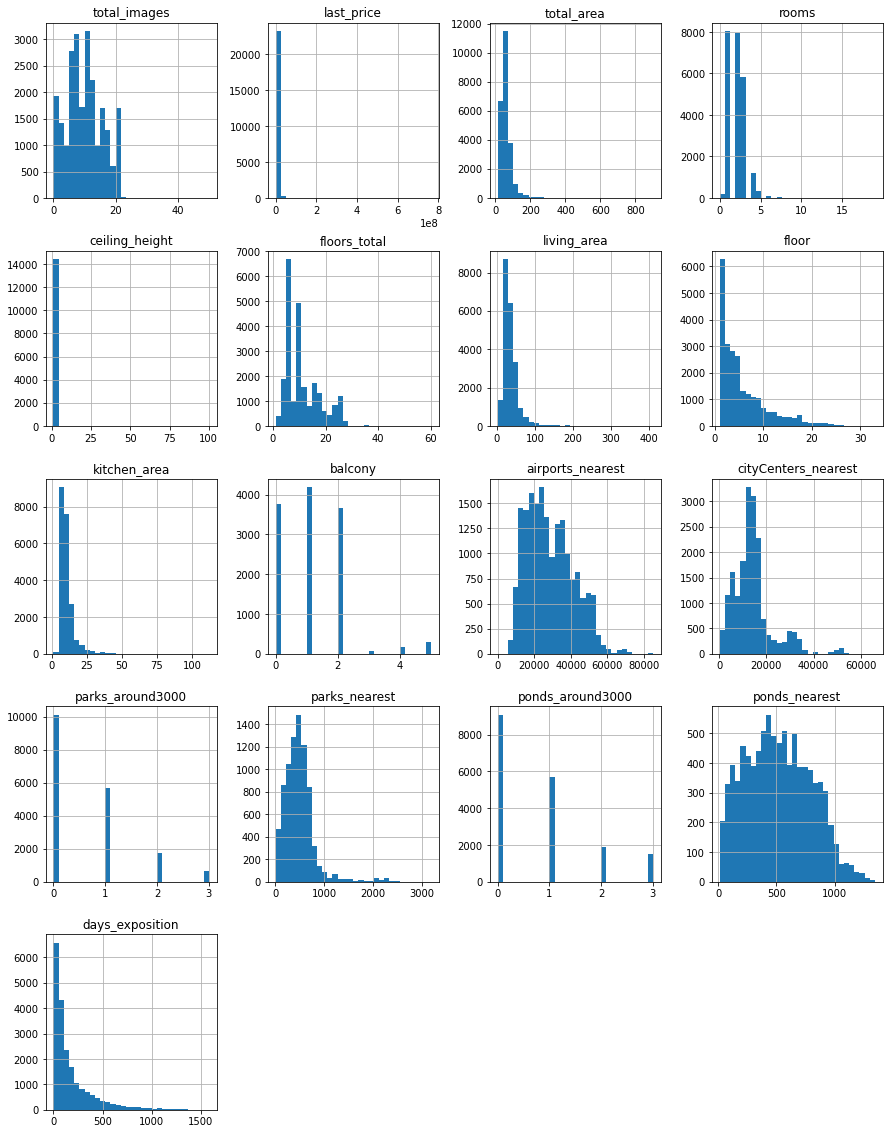

In [5]:
data.hist(bins=30, figsize=(15, 20));

Предварительные выводы о содержании предварительных столбцов:

    1. total_images - количество изображений в карточке объекта недвижимости. Столбец не содержит пустых значений. Гистограмма похода на нормальное распределение - вероятность выбросов невысока. Разброс значений относительно невелик, но для более удобного представления на диаграммах данные нужно категоризировать. 
    2. last_price - стоимость недвижимости. Столбец не содержит пустых значений. Все данные на гистограмме сгруппировались в один столбец - возможно, это связано с выбросами. Данные желательно категоризировать.
    3. total_agea - площадь квартиры. Нет пустых значений.
    4. first_day_exposition - первый день публикации? Категориальные данные. Нет пустых значений. 
    5. rooms - количество комнат. Категориальные данные. Нет пустых значений.
    6. ceiling_height - высота потолков. Есть пустые значения. На гистограмме все данные сгруппировались в одну корзину - возможно, в данных есть выбросы.
    7. floors_total - количество этажей в здании. Содержит пустые значения, но немного. Возможно, это ошибки.
    8. living_area - площадь. Содержит пустые значения. Есть выбросы, но немного
    9. floor - этаж, на котором находится объект. Нет пустых значений  
    10. is_apartment - является ли объект апартаментами. Категориальные данные, и очень много пустых значений 
    11. studio - является ли объект студией: True/False. Нет пустых значений   
    12. open_plan - открытая ли планировка у объекта: True/False. Нет пустых значений   
    13. kitchen_area - площадь кухни, есть пустые значения
    14. balcony - количество балконов. Много пустых значений
    15. locality_name - наименование населенного пункта. Есть незначительное количество пустых значений 
    16. airports_nearest - сколько метров до ближайшего аэропорта
    17. cityCenters_nearest - сколько метров до центра города
    18. parks_around3000 - сколько парков находится в диапазоне 3000 метров
    19. parks_nearest - сколько метров до ближайшего парка
    20. ponds_around3000 - сколько водоемов находится в диапазоне 3000 метров
    21. ponds_nearest - сколько метров до ближайшего водоема
    22. days_exposition - какое количество дней размещено объявление

### Предобработка данных

#### Заполнение пустых значений

##### Определены пропущенные значения

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Перечислим столбцы с пропусками и сфомируем первичные гипотезы:
- ceiling_height - высота потолков. Чаще всего высота потолка стандартая. Можно заменить пустые значения на медианные;
- floors_total - количество этажей в здании. Так как эти данные в дальнейшем будут важны, то пустые значения тоже можно заменить на медианные, но с условием, что медианное значение будет не ниже текущего значения floor;
- living_area - жилая площадь. Для помещений с разной планировкой жилая площадь может быть разной. Также здание может быть нежилым, и тогда в нем вообще не будет жилой площали. Ввиду неопределенности подхода к заполнению пропусков, пустые значения лучше оставить;
- is_apartment - тип параметра - 'object'. Скорее всего объекты из пропусков не являются апартаментами. Но нужно дополнительно проверить, какие значения сейчас содержатся в столбце;
- kitchen_area - площадь кухни. Аналогично пказателю living_area - мы не можем заполнить эти пропуски, так как нам не хватает знаний о типе объекта и его планировки;
- balcony - скорее всего в объектах с пропусками не предусмотрен балкон. После проверки можно заменить пропуски на 0;
- locality_name - мы не можем заменить пустые значения в столбце с типом object на медианные значения, поэтому данные пропуски надо оставить;
- days_exposition - пустые значения означают, что квартиры еще не проданы. Следовательно, пропуски не нужно убирать.

Также не менее 5518 пропущенных значений есть в столбцах airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest. Эти значения были получены расчетным путем и видимо, при расчете либо не удалось точно определить местоположение, из-за чего не получилось рассчитать расстояние. Все пропуски сверх значения 5518 скорее всего обусловлены локализацией объекта и условиями, применявшимися при настройке параметра. Например, рядом с объектом может не быть парка на расстоянии менее 3 км. Данные значения зависят от точной локализации, и поэтому заменить их какими-либо значениями нельзя.

Таким образом, в дальнейшем пустые значения будут заполнены другими значениями в следующих столбцах:

- ceiling_height;
- floors_total;
- is_apartment;
- balcony.

In [7]:
# пропущенные значения бары
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

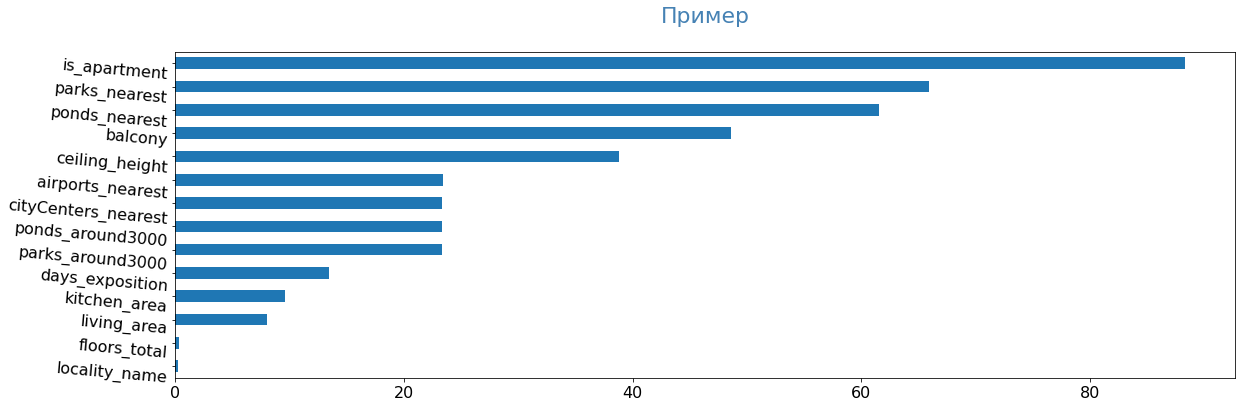

In [8]:
pass_value_barh(data)

##### Исследование и замена пустых значений в столбце "ceiling_height"

In [9]:
display(data[data['ceiling_height'].isna() == True].head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
11,9,3300000.0,44.00,2018-08-27T00:00:00,2,NaN,5.0,31.00,4,False,...,6.00,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
14,1,4400000.0,36.00,2016-06-23T00:00:00,1,NaN,6.0,17.00,1,NaN,...,8.00,0.0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0


Вывод: Зависимости пропусков от каких-либо других показателей не выявлено. В большинстве случаев высота потолков является стандартной, так как обусловлена СНИПом. Поэтому, заполним пропуски медианным значением.

In [10]:
#Находим медиану
ceiling_height_median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)
#Проверка, остались ли пустые значения
print(data['ceiling_height'].isna().sum())

0


##### Исследование и замена пустых значений в столбце "floors_total"

В столбце "floors_total" всего 86 пустых значений, и при этом в столбце "floor" пустых значений нет. 
Есть следующие гипотезы: 
1. Общее количество этажей не пишут для зданий, продающихся целиком
2. Общее количество этажей не пишут для зданий, состоящих из одного этажа

Для начала выведем несколько строк, чтобы попробовать увидеть какую-нибудь зависимость:

In [12]:
display(data[data['floors_total'].isna() == True].head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.80,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.60,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.00,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1930,1,9750000.0,66.77,2016-05-13T00:00:00,2,2.65,NaN,NaN,4,NaN,...,NaN,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0
2392,7,5395770.0,53.00,2017-06-29T00:00:00,2,2.65,NaN,29.00,22,NaN,...,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21T00:00:00,1,2.65,NaN,19.40,15,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
2952,10,6500000.0,54.30,2019-04-23T00:00:00,1,2.65,NaN,22.20,6,NaN,...,12.30,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
3031,9,6400000.0,56.70,2018-03-27T00:00:00,2,2.65,NaN,32.00,12,NaN,...,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0


Вывод:
Первая гипотеза не подтвердилась. В строках с пропусками не такая большая площадь, поэтому вряд ли пропуски свойственны зданиям, продающимся целиком.
Зависимости пропусков от других значений не выявлено. Следовательно, они являются случайными.
В столбце "locality_name" часто встречается "Санкт-Петербург", следовательно, надо дополнительно проверить зависимость пропусков от локализации объекта.

In [13]:
#Проверка второй гипотезы: распределение пропусков по этажам. 
#Если пропуски чаще встречаются для первого этажа - гипотеза подтвердилась
print(data[data['floors_total'].isna() == True].groupby('floor')['floor'].agg('count'))

floor
1      3
2      2
3      4
4     10
5      4
6      9
7      4
8      8
9      5
10     3
11     3
12     6
13     3
14     2
15     3
17     1
18     3
19     3
20     2
21     4
22     1
23     1
24     2
Name: floor, dtype: int64


Вывод: гипотеза не подтвердилась, в пропусках редко встречается первый этаж.

In [14]:
#Проверка зависимости пропусков от локализации
print(data[data['floors_total'].isna() == True].groupby('locality_name')['floor'].agg('count'))

locality_name
Красное Село                        2
Кудрово                             2
Санкт-Петербург                    70
городской посёлок Новоселье         1
деревня Новое Девяткино             1
поселок Мурино                      2
поселок городского типа Токсово     1
посёлок Бугры                       1
посёлок Мурино                      2
посёлок Стрельна                    1
посёлок Шушары                      1
посёлок Щеглово                     1
Name: floor, dtype: int64


Вывод: В столбце "locality_name" часто встречается "Санкт-Петербург", но это еще ничего не значит, так как большая часть объявлений приходится на Санкт-Петербург как на город-миллионник. Тем не менее, при заполнении пустых значений нужно сгруппировать медианы по регионам (все-таки в Санкт-Петербурге больше высотных зданий, чем в Ленинградской области).

По результатам рассмотрения гипотез решено, что пустые значения будут заполнены медианными значениями по соответствующим регионам, но при условии, что это значение не меньше текущего значения столбца floor

In [15]:
#Проверка, что сейчас в data нет строк, где floors_total превышал бы floor
#Заполняем все пустые значения медианными значениями
for locality in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality, 'floors_total'].median()
    data.loc[(data['locality_name'] == locality) & (data['floors_total'].isna()), 'floors_total'] = median

#Перезапишем строки, где медианное значениие ниже, чем этаж, на котором находится объект, 
#и укажем в floors_total значение floor
data.loc[data['floors_total'] < data['floor'], 'floors_total'] = data.loc[data['floors_total'] < data['floor'], 
                                                                          'floor']

#Осталась одна пустая строка, где и floors_total==NaN, и locality_name==NaN. 
#Заполним значение вручную значением floor
data.loc[(data['floors_total'].isna()) & (data['locality_name'].isna()), 'floors_total'] = \
data.loc[(data['floors_total'].isna()) & (data['locality_name'].isna()), 'floor']

#Проверим количество оставшихся пустых строк
print(data['floors_total'].isna().sum()) 

0


##### Исследование и замена пустых значений в столбце is_apartment

In [16]:
#Вывод 5 строк для выявления возможных закономерностей
display(data[data['is_apartment'].isna()].head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Вывод: закономерностей в пропусках не выявлено. Скорее всего объекты из пропусков не являются апартаментами, но лучше проверить количество элементов True/False

In [17]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Вывод: Скорее всего объекты из пропусков не являются апартаментами (False), поэтому заполним их значения как False

In [18]:
#Заполнение пустых значений значением False
data['is_apartment'] = data['is_apartment'].fillna(False)

In [19]:
#Проверка, что все пустые данные заполнены
data['is_apartment'].isna().sum()

0

##### Исследование и замена пустых значений в столбце balcony

In [20]:
#Вывод 5 строк для выявления возможных закономерностей
display(data[data['balcony'].isna()].head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.30,3,False,...,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0


Вывод: закономерностей не выявлено, но скорее всего пустое значение означает отсутствие балкона. Поэтому заменим значения на 0

In [21]:
#Заполнение пустых значений значением False
data['balcony'] = data['balcony'].fillna(0)

In [22]:
#Проверка, что все пустые данные заполнены
data['balcony'].isna().sum()

0

##### Исследование и замена пустых значений в столбце days_exposition

In [23]:
#Вывод 5 строк для выявления возможных закономерностей
display(data[data['days_exposition'].isna()].head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,False,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22.0,NaN,3,False,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.6,2018-12-02T00:00:00,2,2.65,9.0,30.3,7,False,...,7.0,0.0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.1,2019-01-31T00:00:00,2,2.60,24.0,29.7,9,False,...,8.3,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN


Вывод: прямых, объяснимых с точки зрения логики, зависимостей не выявлено. Заменим пустые данные days_of_exposition на разницу между текущей датой и датой first_day_exposition.

#### Изменение типов данных столбцов

In [25]:
#Выведем типы данных в столбцах
print(data.dtypes)

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object


Вывод:
Необходимо скорректировать тип в следующих столбцах:
- first_day_exposition - это дата, поэтому нужно перевести ее в datetime
- floors_total - нужно перевести в int, так как число этажей в доме не может быть дробным
- balcony - количество балконов, поэтому тоже надо перевести в int
- parks_around3000 - количество парков в районе 3000 метров. Целое число, поэтому переводим в int
- ponds_around3000 - количество прудов в районе 3000 метров. Целое число, поэтому переводим в int

In [26]:
try:
    #Исправление типа данных в floors_total
    data['floors_total'] = data['floors_total'].astype('int')
    #Исправление типа данных в balcony
    data['balcony'] = data['balcony'].astype('int')
except:
    print('Ошибка')

Вывод:
Мы не можем изменить типы столбцов first_day_exposition, parks_around3000 и ponds_around3000 из-за того, что они содержат пустые значения, а нам их нужно оставить

#### Устранение неявных дубликатов в названии населенного пункта

In [27]:
#Выведем уникальные значения столбца locality_name в виде list
print(pd.Series(data['locality_name'].unique()).sort_values().tolist())

['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург', 'городской поселок Большая Ижора', 'городской поселок Янино-1', 'городской посёлок Будогощь', 'городской посёлок Виллози', 'городской посёлок Лесогорский', 'городской посёлок Мга', 'городской посёлок Назия', 'городской посёлок Новоселье', 'городской посёлок Павлово', 'городской посёлок Рощино', 'городской посёлок Свирьстрой', 'городской посёлок Советский', 'городской посёлок Фёдоровское', 'городской посёлок Янино-1', 'деревня Агалатово', 'деревня Аро',

Вывод: выявлены дубликаты, обусловленные использованием в разных написаниях одного и того же пункта через "е" или "ё"

In [28]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [29]:
#Проверка
print(pd.Series(data['locality_name'].unique()).sort_values().tolist())

['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург', 'городской поселок Большая Ижора', 'городской поселок Будогощь', 'городской поселок Виллози', 'городской поселок Лесогорский', 'городской поселок Мга', 'городской поселок Назия', 'городской поселок Новоселье', 'городской поселок Павлово', 'городской поселок Рощино', 'городской поселок Свирьстрой', 'городской поселок Советский', 'городской поселок Федоровское', 'городской поселок Янино-1', 'деревня Агалатово', 'деревня Аро', 'деревня Батово', 'деревня Б

In [30]:
data.locality_name.nunique()

330

#### Устранение явных дубликатов

In [31]:
#Найдем количество полных дубликатов строк
data.duplicated().sum()

0

In [32]:
#Найдем количество полных дубликатов по сумме ключевых параметров (подмножеству):
#общ. площадь квартиры, этаж, общая этажность дома
#расстояние до центра добавлять не стала, т.к. в нем пустые значения
#Создадим для этого промедуточный столбец - потом удалим

data['aggregated_parameter'] = (                                
                                data['total_area'] 
                                + data['floor']
                                + data['floors_total']
                                + data['cityCenters_nearest'].isna()
                               )

display(data[data['aggregated_parameter'].duplicated()].sort_values(by = 'aggregated_parameter').head(10))    

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,aggregated_parameter
19642,5,1190000.0,14.0,2018-07-29T00:00:00,1,2.65,5,11.0,1,False,...,0,Санкт-Петербург,9898.0,11122.0,0.0,NaN,0.0,NaN,4.0,20.0
19807,0,3800000.0,13.0,2018-07-04T00:00:00,1,2.65,5,10.0,3,False,...,0,Санкт-Петербург,21302.0,1242.0,1.0,592.0,3.0,27.0,9.0,21.0
17961,3,1400000.0,13.0,2017-12-03T00:00:00,1,2.60,9,NaN,1,False,...,0,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410.0,23.0
10208,3,1900000.0,17.0,2018-08-14T00:00:00,1,2.75,4,13.0,2,False,...,0,Санкт-Петербург,25072.0,5639.0,0.0,NaN,0.0,NaN,7.0,23.0
16949,9,1550000.0,15.0,2018-08-21T00:00:00,1,2.70,9,NaN,1,False,...,0,Санкт-Петербург,51048.0,16376.0,0.0,NaN,1.0,1079.0,42.0,25.0
10964,3,1150000.0,20.0,2017-03-04T00:00:00,1,2.65,3,16.0,1,False,...,0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,108.0,25.0
9817,8,2190000.0,19.0,2018-10-12T00:00:00,0,3.50,5,15.0,1,False,...,0,Санкт-Петербург,29561.0,8264.0,2.0,383.0,1.0,781.0,89.0,25.0
21419,4,1870000.0,20.0,2018-03-06T00:00:00,1,2.50,5,14.0,1,False,...,0,Санкт-Петербург,16652.0,15654.0,1.0,619.0,1.0,937.0,45.0,26.0
8454,7,2250000.0,19.0,2019-03-12T00:00:00,0,3.00,6,NaN,2,False,...,0,Санкт-Петербург,12430.0,7316.0,1.0,238.0,3.0,374.0,44.0,27.0
20714,7,1200000.0,18.0,2018-01-04T00:00:00,1,2.65,4,NaN,4,False,...,0,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,45.0,27.0


Вывод:
Явных дубликатов не выявлено.
Попытка найти дубликаты с помощью аггрегированного параметра не показала надежных результатов, по которым можно было бы удалить дубликаты.

#### Устранение редких и выбивающихся значений во всех столбцах

In [33]:
#Для каждого числового показателя найдем минимум, максимум, среднюю, 1й, 2й, 3й квантиль
data_short = pd.DataFrame(columns = ['column_name', 'min', '0_025_quantile', 'first_quantile', 'median', 
                                     'third_quantile', '0_975_quantile', 'max', 'mean', 'count'])

for column in data.columns:
    try:
        if column not in ['first_day_exposition', 'is_apartment', 'studio', 'open_plan', 'locality_name']:
            new_row = {'column_name' : column, 
                               'min' : data[column].min(), 
                               '0_025_quantile' : data[column].quantile(0.025).round(2), 
                               'first_quantile' : data[column].quantile(0.25), 
                               'median' : data[column].median(), 
                               'third_quantile' : data[column].quantile(0.75),
                               '0_975_quantile' : data[column].quantile(0.975).round(2), 
                               'max' : data[column].max(), 
                               'mean' : data[column].mean().round(2),
                               'count' : data[column].count()
                              }
            data_short = data_short.append(new_row, ignore_index = True)
    except:
        continue

display(data_short)

,column_name,min,0_025_quantile,first_quantile,median,third_quantile,0_975_quantile,max,mean,count
0,total_images,0,0.0,6.0,9.00,14.0,20.00,50,9.86,23699
1,last_price,12190.0,1449945.0,3400000.0,4650000.00,6800000.0,22361750.00,763000000.0,6541548.77,23699
2,total_area,12.0,29.0,40.0,52.00,69.9,149.00,900.0,60.35,23699
3,rooms,0,1.0,1.0,2.00,3.0,4.00,19,2.07,23699
4,ceiling_height,1.0,2.5,2.6,2.65,2.7,3.33,100.0,2.72,23699
5,floors_total,1,3.0,5.0,9.00,16.0,25.00,60,10.68,23699
6,living_area,2.0,14.4,18.6,30.00,42.3,87.00,409.7,34.46,21796
7,floor,1,1.0,2.0,4.00,8.0,20.00,33,5.89,23699
8,kitchen_area,1.3,5.2,7.0,9.10,12.0,25.60,112.0,10.57,21421
9,balcony,0,0.0,0.0,0.00,1.0,2.00,5,0.59,23699


Вывод: Нужно убрать выбросы из следующих столбцов:
- 'last_price', т.к. есть слишком дешевые объекты недвижимости (12 190 рублей)
- 'total_area', т.к. есть объекты недвижимости со слишком большой площадью (900 кв.м)
- 'ceiling_height', т.к. есть объекты с высотой потолков 1 метр и 100 метров
- 'rooms', т.к. есть объекты с 19 комнатами
- 'days_exposition', т.к. есть объекты, которые "висят" уже больше 4х лет
- 'living_area', т.к. есть объекты недвижимости со слишком большой жилой площадью (450 кв.м)  
- 'kitchen_area', т.к. есть объекты недвижимости со слишком большой площадью кухни (112 кв.м)  
- 'floor', 'floors_total'т.к. есть объекты на высоких этажах, а в среднем по Санкт-Петербургу и Лен.области чаще встречаются типовые 9-этажные дома

В таблице выше не рассмотрены столбцы 'first_day_exposition', 'is_apartment', 'studio', 'open_plan', 'locality_name':
- Столбец 'first_day_exposition' содержит дату, его рассмотрим отдельно
- Столбец 'locality_name' уже ранее был рассмотрен при удалении неявных дубликатов,
- Столбецы 'is_apartment', 'studio', 'open_plan' содержат только значения True или False, поэтому в них не может быть выбросов 

##### Устранение редких значений в last_price

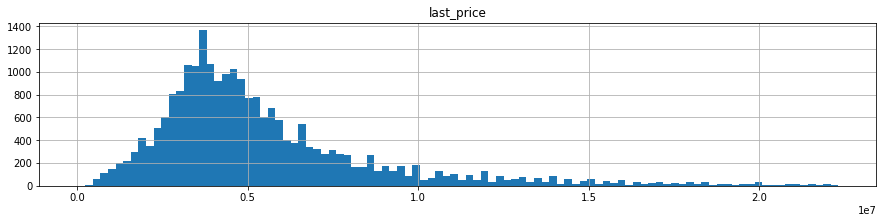

In [34]:
#Проверим общий вид диаграммы. Обрежем на значении квантиля 0,975
data[data['last_price'] < 22361750].hist('last_price',bins=100, figsize=(15,3),grid = True);

In [35]:
#Из диаграммы видно, что значения скошены вправо. 
#Поэтому уберем 0,5% аномально низких значений слева, и 0,5% справа.
print('0,5% квантиль', data['last_price'].quantile(0.005))
print('99,5% квантиль', data['last_price'].quantile(0.995))
print('Доля потерь от первоначальной выгрузки составит:', (data.loc[(data['last_price'] >= 800000) & 
                                                                    (data['last_price'] <= 54510000), 
                                                                    'last_price']
                                                               .count() / 23699 - 1)
                                                               .round(4))

0,5% квантиль 800000.0
99,5% квантиль 54509999.9999984
Доля потерь от первоначальной выгрузки составит: -0.0099


In [36]:
#Удаляем из data все значения меньше 0,5% квантиля и выше 99% квантиля
data = data[(data['last_price'] >= 800000) & (data['last_price'] <= 54510000)]

In [39]:
#Проверим еще раз статистики
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,aggregated_parameter
count,23465.000000,2.346500e+04,23465.000000,23465.000000,23465.000000,23465.000000,21598.000000,23465.000000,21227.000000,23465.000000,18041.00000,18062.000000,18063.000000,7986.000000,18063.000000,9008.000000,20325.000000,23465.000000
mean,9.849009,6.049605e+06,59.405799,2.060303,2.722137,10.729981,33.965265,5.909823,10.466095,0.593735,28808.38734,14254.617207,0.604717,492.159404,0.763273,519.863233,180.233899,76.275861
std,5.676199,5.082617e+06,31.338425,1.058018,0.991184,6.598622,20.000574,4.895782,5.448528,0.960924,12665.05848,8598.481831,0.795558,342.209992,0.933385,277.920202,219.242893,32.368113
min,0.000000,8.000000e+05,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.00000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,19.000000
25%,6.000000,3.450000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18539.00000,9377.000000,0.000000,288.000000,0.000000,296.000000,45.000000,55.850000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26758.00000,13145.000000,0.000000,456.000000,0.000000,503.000000,95.000000,69.400000
75%,14.000000,6.750000e+06,69.300000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,37347.00000,16318.000000,1.000000,613.000000,1.000000,733.000000,230.000000,87.500000
max,50.000000,5.400000e+07,517.000000,19.000000,100.000000,60.000000,332.000000,33.000000,100.700000,5.000000,84869.00000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,524.000000


Вывод:
За счет удаления из выборки сверхдорогих объектов значения максимумов также снизились по всем остальным показателям. Сейчас был удален почти 1% от выгрузки

##### Устранение редких значений в total_area, living_area и kitchen_area

''

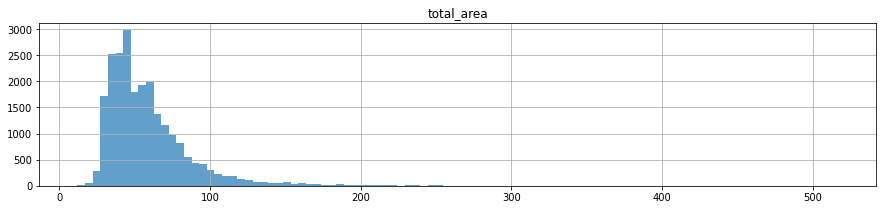

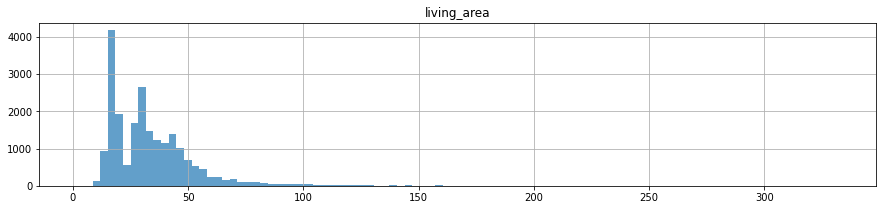

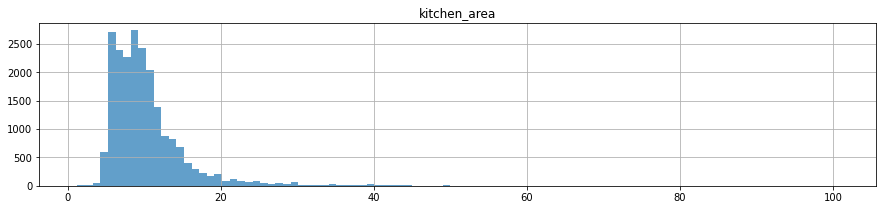

In [40]:
#Проверим общий вид диаграмм
data.hist('total_area',bins=100, figsize=(15,3),grid = True, alpha = 0.7)
data.hist('living_area',bins=100, figsize=(15,3),grid = True, alpha = 0.7)
data.hist('kitchen_area',bins=100, figsize=(15,3),grid = True, alpha = 0.7)
;

In [41]:
#Из диаграммы видно, что значения скошены вправо, но видно, что выбивающиеся значения - 
#это значения меньше 29 включительно, они же отражаются как 0,025 квантиль до и после корректировок
#Чтобы сильно не обрезать выборку слева, уберем только 0,05% аномально низких значений слева и справа.
print('0,5% квантиль total_area', data['total_area'].quantile(0.005).round(2))
print('99,5% квантиль total_area', data['total_area'].quantile(0.995).round(2))
print('0,5% квантиль living_area', data['living_area'].quantile(0.005).round(2))
print('99,5% квантиль living_area', data['living_area'].quantile(0.995).round(2))
print('0,5% квантиль kitchen_area', data['kitchen_area'].quantile(0.005).round(2))
print('99,5% квантиль kitchen_area', data['kitchen_area'].quantile(0.995).round(2))

0,5% квантиль total_area 23.5
99,5% квантиль total_area 214.0
0,5% квантиль living_area 11.2
99,5% квантиль living_area 136.1
0,5% квантиль kitchen_area 5.0
99,5% квантиль kitchen_area 40.0


In [42]:
#Контроль процента общей потери данных относительно изначального количества строк 23699
#После удаления редких значений в last_price количество редких значений осталось 23465
print('Общая потеря данных составит: ', ((data.loc[(
                                                    (data['total_area'] < 23.5) | 
                                                    (data['total_area'] > 214) |
                                                    (data['living_area'] < 11.2) | 
                                                    (data['living_area'] > 136.1) |
                                                    (data['kitchen_area'] < 5) | 
                                                    (data['kitchen_area'] > 40)
                                                   ),
                                                   'total_area'
                                                  ]
                                              .count() + 23699 - 23465) / 23699)
                                              .round(4)
                                         )

Общая потеря данных составит:  0.0325


In [43]:
#Удаляем редкие значения
data = data[
             (data['total_area'] >= 23.5) &
             (data['total_area'] <= 214) 
           ]

data = data[
             ((data['living_area'] >= 11.2) & 
              (data['living_area'] <= 136.1)) |
             (data['living_area'].isna() == True)
           ]

data = data[
             ((data['kitchen_area'] >= 5) &
              (data['kitchen_area'] <= 40)) |
             (data['kitchen_area'].isna() == True)
           ]

In [46]:
#Проверим еще раз статистики
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,aggregated_parameter
count,22929.000000,2.292900e+04,22929.000000,22929.000000,22929.000000,22929.000000,21111.000000,22929.000000,20815.000000,22929.000000,17617.000000,17637.000000,17638.000000,7767.000000,17638.000000,8750.000000,19881.000000,22929.000000
mean,9.849056,5.884942e+06,58.201697,2.043264,2.719765,10.754677,33.343018,5.914126,10.227740,0.596275,28821.912641,14305.344900,0.599558,493.652890,0.758363,521.282743,179.797193,75.101300
std,5.667040,4.589308e+06,25.911703,0.992186,1.001208,6.586801,17.075632,4.895123,4.600331,0.962298,12679.801144,8561.847412,0.790482,342.611784,0.931215,277.123053,218.218221,27.460936
min,0.000000,8.000000e+05,23.500000,0.000000,1.000000,1.000000,11.200000,1.000000,5.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,28.600000
25%,6.000000,3.450000e+06,40.000000,1.000000,2.600000,5.000000,18.700000,2.000000,7.000000,0.000000,18494.000000,9496.000000,0.000000,289.000000,0.000000,299.250000,45.000000,56.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26798.000000,13168.000000,0.000000,456.000000,0.000000,506.000000,95.000000,69.500000
75%,14.000000,6.700000e+06,69.000000,3.000000,2.700000,16.000000,42.000000,8.000000,11.800000,1.000000,37407.000000,16337.000000,1.000000,614.000000,1.000000,733.000000,230.000000,87.000000
max,50.000000,5.400000e+07,214.000000,11.000000,100.000000,60.000000,136.100000,33.000000,40.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,245.000000


Вывод:
    Мы удалили уже 3,25% от изначальной выгрузки

##### Устранение редких значений в ceiling_height

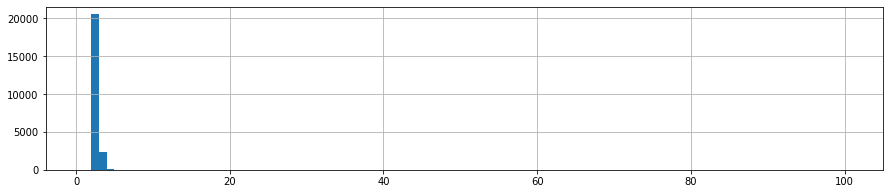

In [47]:
#Проверим общий вид диаграммы
data['ceiling_height'].hist(bins=100, figsize=(15,3), grid = True);

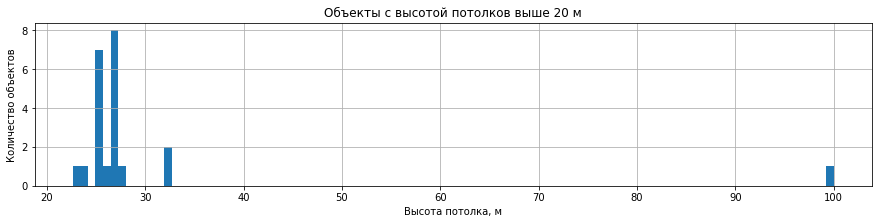

In [48]:
#Выведем на гистограмму объекты с высотой потолков выше 20 метров
fig, ax = plt.subplots()

ax.hist(data.loc[data['ceiling_height'] > 20, 'ceiling_height'], bins=100)

ax.set_title('Объекты с высотой потолков выше 20 м')
ax.set_xlabel('Высота потолка, м')
ax.set_ylabel('Количество объектов')
ax.grid()

fig.set_figwidth(15)
fig.set_figheight(3)

plt.show()

In [49]:
#Одна строка с высотой 100 метров - явный выброс, поэтому сразу удалим его
data = data[data['ceiling_height'] < 40]

In [50]:
#Строки с потолками выше 20 метров - скорее всего опечатки. 
#Например, вместо 2.7м в карточке указано 27м. Поэтому разделим результат на 10
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] /= 10

In [51]:
#Уберем только 0,05% аномально низких или высоких значений слева и справа.
print('0,5% квантиль ceiling_height', data['ceiling_height'].quantile(0.005).round(2))
print('99,5% квантиль ceiling_height', data['ceiling_height'].quantile(0.995).round(2))

#Контроль процента общей потери данных относительно изначального количества строк 23699
#После удаления редких значений в area количество редких значений осталось 22929
#Удалим объекты с полотками выше 5 м (а не 3.75), чтобы не исключить исторический центр Санкт-Петербурга
print('Общая потеря данных составит: ', ((data.loc[(
                                                    (data['ceiling_height'] < 2.5) | 
                                                    (data['ceiling_height'] > 5) 
                                                   ),
                                                   'ceiling_height'
                                                  ]
                                              .count() + 23699 - 22929) / 23699)
                                              .round(4)
                                         )

0,5% квантиль ceiling_height 2.5
99,5% квантиль ceiling_height 3.75
Общая потеря данных составит:  0.036


In [52]:
#Удалим объекты с полотками ниже 2.5 м и выше 5 м
data = data[(data['ceiling_height'] >= 2.5) & (data['ceiling_height'] <= 5)]

In [55]:
#Проверим еще раз статистики
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,aggregated_parameter
count,22845.000000,2.284500e+04,22845.000000,22845.000000,22845.000000,22845.000000,21034.000000,22845.000000,20742.000000,22845.000000,17563.000000,17583.000000,17584.000000,7733.000000,17584.000000,8722.000000,19809.000000,22845.000000
mean,9.854191,5.890018e+06,58.231256,2.043554,2.692055,10.764675,33.351486,5.918494,10.234140,0.595229,28828.516654,14304.444748,0.598556,493.689254,0.758417,521.443018,179.910849,75.144760
std,5.665249,4.589361e+06,25.931842,0.992655,0.204392,6.589367,17.086281,4.899427,4.601044,0.961118,12681.571060,8562.099089,0.789988,343.175061,0.931351,277.143120,218.412594,27.476852
min,0.000000,8.000000e+05,23.500000,0.000000,2.500000,1.000000,11.200000,1.000000,5.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,28.600000
25%,6.000000,3.458944e+06,40.000000,1.000000,2.600000,5.000000,18.700000,2.000000,7.000000,0.000000,18495.500000,9496.000000,0.000000,289.000000,0.000000,299.250000,45.000000,56.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.070000,0.000000,26803.000000,13168.000000,0.000000,456.000000,0.000000,506.000000,95.000000,69.500000
75%,14.000000,6.700000e+06,69.000000,3.000000,2.700000,16.000000,42.000000,8.000000,11.850000,1.000000,37407.000000,16336.000000,1.000000,614.000000,1.000000,733.000000,230.000000,87.000000
max,50.000000,5.400000e+07,214.000000,11.000000,4.800000,60.000000,136.100000,33.000000,40.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,245.000000


Вывод:
    Мы удалили уже 3,6% от изначальной выгрузки

##### Устранение редких значений в rooms

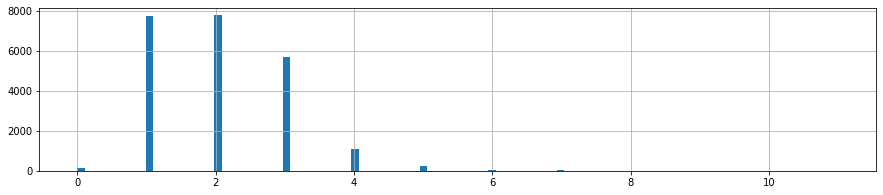

In [56]:
#Проверим общий вид диаграммы
data['rooms'].hist(bins=100, figsize=(15,3), grid = True);

In [57]:
#На диаграмме явно видно небольшое количество объектов с 6 и более комнатами
data.groupby('rooms')['rooms'].agg('count')

rooms
0      162
1     7753
2     7774
3     5702
4     1110
5      258
6       60
7       23
8        2
11       1
Name: rooms, dtype: int64

In [58]:
#Удалим объекты с 7 и более комнатами
#Контроль количества удаленных значений
print('Общая потеря данных составит: ', ((data.loc[(
                                                    (data['rooms'] > 6) 
                                                   ),
                                                   'rooms'
                                                  ]
                                              .count() + 23699 - 22845) / 23699)
                                              .round(4)
                                         )

Общая потеря данных составит:  0.0371


In [59]:
#Удалим объекты с 7 и более комнатами
data = data[data['rooms'] <= 6]

In [60]:
#Проверим еще раз статистики
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,aggregated_parameter
count,22819.000000,2.281900e+04,22819.000000,22819.000000,22819.000000,22819.000000,21010.000000,22819.000000,20718.000000,22819.000000,17537.000000,17557.000000,17558.000000,7712.000000,17558.000000,8706.000000,19793.000000,22819.000000
mean,9.852973,5.875391e+06,58.107903,2.037644,2.691690,10.771287,33.262649,5.921688,10.228899,0.595863,28834.735531,14319.356154,0.597562,493.727438,0.758002,521.631518,179.885616,75.031476
std,5.664440,4.566645e+06,25.669663,0.977274,0.203923,6.590043,16.878687,4.900934,4.597216,0.961459,12687.524090,8558.493357,0.789317,343.509348,0.931154,277.090882,218.406610,27.269531
min,0.000000,8.000000e+05,23.500000,0.000000,2.500000,1.000000,11.200000,1.000000,5.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,28.600000
25%,6.000000,3.450000e+06,40.000000,1.000000,2.600000,5.000000,18.700000,2.000000,7.000000,0.000000,18490.000000,9538.000000,0.000000,289.000000,0.000000,300.000000,45.000000,56.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26831.000000,13175.000000,0.000000,456.000000,0.000000,506.000000,95.000000,69.500000
75%,14.000000,6.700000e+06,69.000000,3.000000,2.700000,16.000000,42.000000,8.000000,11.800000,1.000000,37407.000000,16357.000000,1.000000,614.000000,1.000000,733.000000,230.000000,87.000000
max,50.000000,5.400000e+07,214.000000,6.000000,4.800000,60.000000,136.000000,33.000000,40.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,245.000000


Вывод:
    Мы удалили уже 3,7% от изначальной выгрузки

##### Устранение редких значений в floor и floors_total

''

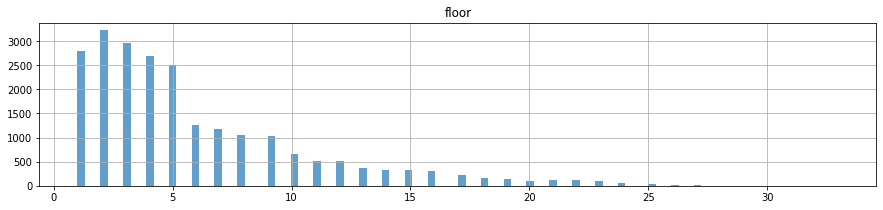

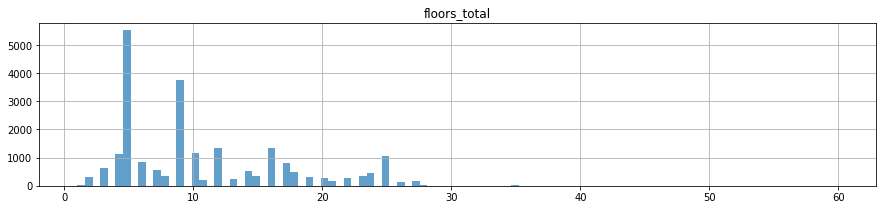

In [61]:
#Проверим общий вид диаграмм
data.hist('floor',bins=100, figsize=(15,3),grid = True, alpha = 0.7)
data.hist('floors_total',bins=100, figsize=(15,3),grid = True, alpha = 0.7)
;

In [62]:
#Уберем только 0,05% аномально высоких значений.
#Самый низкие не убираем, т.к. это первые этажи, а они есть в любом доме
print('99,5% квантиль floor', data['floor'].quantile(0.995).round(2))
print('99,5% квантиль floors_total', data['floors_total'].quantile(0.995).round(2))

#Контроль процента общей потери данных относительно изначального количества строк 23699
#После удаления редких значений в rooms количество редких значений осталось 22819
print('Общая потеря данных составит: ', ((data.loc[(
                                                    (data['floors_total'] > 27) 
                                                   ),
                                                   'floors_total'
                                                  ]
                                              .count() + 23699 - 22819) / 23699)
                                              .round(4)
                                         )

99,5% квантиль floor 24.0
99,5% квантиль floors_total 27.0
Общая потеря данных составит:  0.0393


In [63]:
#Удалим высокие дома с более чем 27 этажами. 
#Удалять выбросы на объектах с высоким floor не будем, 
#так как эти значения все равно не превышают floors_total
data = data[data['floors_total'] <= 27]

In [64]:
#Проверим еще раз статистики
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,aggregated_parameter
count,22767.000000,2.276700e+04,22767.000000,22767.000000,22767.000000,22767.000000,20960.000000,22767.000000,20670.000000,22767.000000,17489.000000,17509.000000,17510.000000,7706.000000,17510.000000,8668.000000,19752.000000,22767.000000
mean,9.848860,5.873847e+06,58.102281,2.038169,2.691774,10.721571,33.268856,5.897571,10.220933,0.595291,28840.942535,14303.740419,0.598801,493.719050,0.754312,523.014075,179.863811,74.952371
std,5.663943,4.570522e+06,25.682803,0.977652,0.204117,6.510178,16.889315,4.860340,4.594237,0.961095,12680.932821,8560.498064,0.789754,343.633691,0.927464,276.466581,218.456337,27.228532
min,0.000000,8.000000e+05,23.500000,0.000000,2.500000,1.000000,11.200000,1.000000,5.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,28.600000
25%,6.000000,3.450000e+06,40.000000,1.000000,2.600000,5.000000,18.700000,2.000000,7.000000,0.000000,18488.000000,9510.000000,0.000000,289.000000,0.000000,303.000000,45.000000,56.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26877.000000,13165.000000,0.000000,456.000000,0.000000,507.000000,95.000000,69.400000
75%,14.000000,6.690000e+06,68.900000,3.000000,2.700000,16.000000,42.000000,8.000000,11.800000,1.000000,37407.000000,16306.000000,1.000000,614.000000,1.000000,733.000000,230.000000,87.000000
max,50.000000,5.400000e+07,214.000000,6.000000,4.800000,27.000000,136.000000,27.000000,40.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,245.000000


Вывод:
    Мы удалили уже 3,9% от изначальной выгрузки

##### Устранение редких значений в days_exposition

''

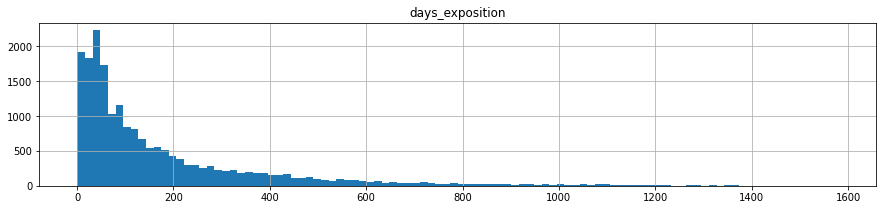

In [65]:
#Проверим общий вид гистограммы
data.hist('days_exposition',bins=100, figsize=(15,3), grid = True)
;

In [66]:
#Уберем только 0,05% аномально высоких значений. Нет смысла удалять низкие, т.к. их много
print('99,5% квантиль days_exposition', data['days_exposition'].quantile(0.995).round(2))

#Контроль процента общей потери данных относительно изначального количества строк 23699
#После удаления редких значений в floors_total количество редких значений осталось 22767
#Удалим объекты с количеством дней более 1200, чтобы не выйти за предел оптимально сокращения объема
print('Общая потеря данных составит: ', ((data.loc[(
                                                    (data['days_exposition'] > 1200) 
                                                   ),
                                                   'days_exposition'
                                                  ]
                                              .count() + 23699 - 22767) / 23699)
                                              .round(4)
                                         )

99,5% квантиль days_exposition 1175.49
Общая потеря данных составит:  0.0429


In [67]:
#Удаляем строки с аномальными значениями
data = data[(data['days_exposition'] <= 1200) | (data['days_exposition'].isna() == True)]

In [68]:
#Проверим еще раз статистики
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,aggregated_parameter
count,22683.000000,2.268300e+04,22683.000000,22683.000000,22683.000000,22683.000000,20883.000000,22683.000000,20590.000000,22683.000000,17416.000000,17436.000000,17437.000000,7664.000000,17437.000000,8619.000000,19668.000000,22683.000000
mean,9.859410,5.860670e+06,58.026956,2.036371,2.691321,10.725080,33.226253,5.900145,10.213304,0.595644,28843.754651,14316.068651,0.597637,493.413361,0.752538,523.834784,174.965375,74.883500
std,5.663781,4.554111e+06,25.618148,0.976737,0.203628,6.511416,16.855749,4.860531,4.590250,0.960999,12686.445511,8553.525028,0.788736,342.033596,0.926255,276.557502,205.536025,27.174059
min,0.000000,8.000000e+05,23.500000,0.000000,2.500000,1.000000,11.200000,1.000000,5.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,28.600000
25%,6.000000,3.450000e+06,40.000000,1.000000,2.600000,5.000000,18.700000,2.000000,7.000000,0.000000,18462.750000,9551.000000,0.000000,289.000000,0.000000,303.000000,45.000000,56.000000
50%,9.000000,4.610000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26890.000000,13171.000000,0.000000,456.000000,0.000000,509.000000,94.000000,69.300000
75%,14.000000,6.650000e+06,68.700000,3.000000,2.700000,16.000000,42.000000,8.000000,11.800000,1.000000,37407.000000,16315.250000,1.000000,614.000000,1.000000,733.000000,227.000000,86.985000
max,50.000000,5.400000e+07,214.000000,6.000000,4.800000,27.000000,136.000000,27.000000,40.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1200.000000,245.000000


Вывод:
    Мы удалили 4,3% от изначальной выгрузки.

##### Проверка редких значений в first_day_exposition

In [69]:
#Проверка адекватности значений в first_day_exposition. 
print('Минимум по столбцу first_day_exposition:', data['first_day_exposition'].min())
print('Максимум по столбцу first_day_exposition:', data['first_day_exposition'].max())

Минимум по столбцу first_day_exposition: 2014-11-27T00:00:00
Максимум по столбцу first_day_exposition: 2019-05-03T00:00:00


Минимальное и максимальное значение first_day_exposition адекватны, корректировка не нужна

##### Проверка редких значений в стоимости 1 кв.м

Удаление редких данных будет проведено в пункте 3.1, там, где создается новый столбец

In [71]:
# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,683.00","22,683.00","22,683.00","19,668.00","22,683.00","20,883.00","20,590.00","22,683.00","22,683.00"
min,0.00,23.50,2.50,1.00,"800,000.00",11.20,5.00,1.00,1.00
max,6.00,214.00,4.80,"1,200.00","54,000,000.00",136.00,40.00,27.00,27.00
median,2.00,52.00,2.65,94.00,"4,610,000.00",30.00,9.00,4.00,9.00


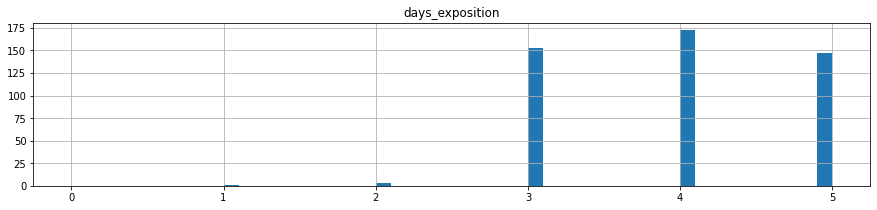

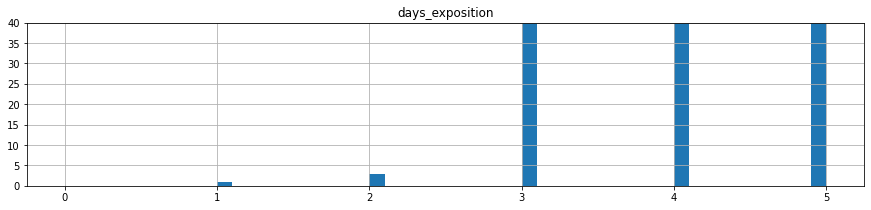

In [72]:
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

In [73]:
data.rooms.value_counts().to_frame()

,rooms
1,7724
2,7717
3,5667
4,1102
5,254
0,160
6,59


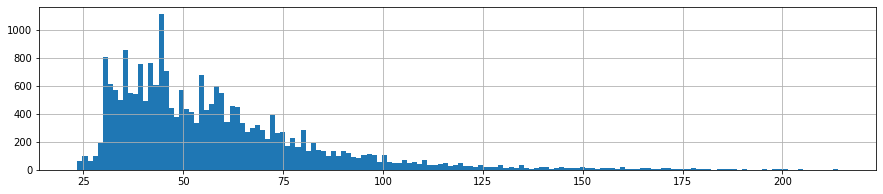

In [74]:
data.total_area.hist(bins = 150, figsize = (15,3));

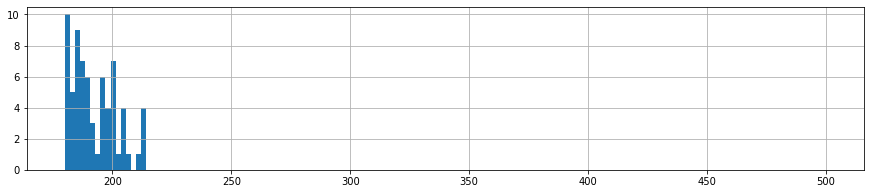

In [75]:
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

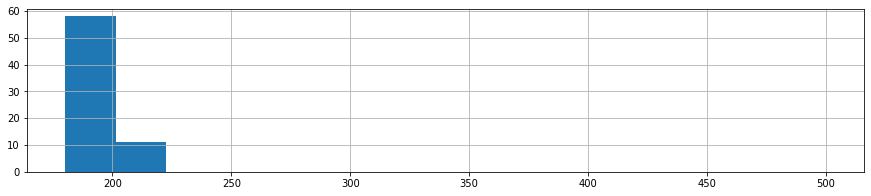

In [76]:
data.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

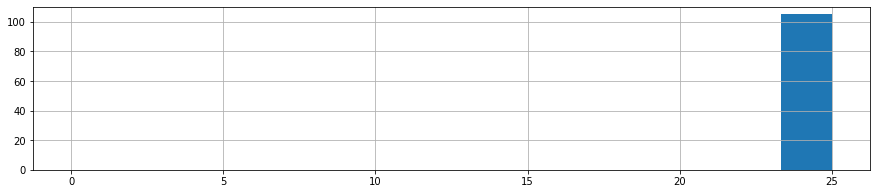

In [77]:
data.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [78]:
# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,24.00,2.50,3.00,"850,000.00",12.00,5.00,1.00,2.00
0.01,1.00,27.48,2.50,4.00,"1,170,000.00",14.00,5.00,1.00,2.00
0.5,2.00,52.00,2.65,94.00,"4,610,000.00",30.00,9.00,4.00,9.00
0.99,5.00,155.00,3.50,980.00,"25,782,804.60",94.59,30.00,22.00,26.00
0.9988,6.00,195.15,4.09,"1,161.80","45,594,240.00",122.09,38.90,25.78,27.00


### Посчитайте и добавьте в таблицу новые столбцы

#### Добавление в таблицу нового столбца: цена одного квадратного метра

In [79]:
data['cost_per_meter'] = data['last_price'] / data['total_area']
data['cost_per_meter'] = data['cost_per_meter'].round(2)

##### Удаление строк с аномальным cost_per_meter

In [80]:
#Вывод общих статистик
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,aggregated_parameter,cost_per_meter
count,22683.000000,2.268300e+04,22683.000000,22683.000000,22683.000000,22683.000000,20883.000000,22683.000000,20590.000000,22683.000000,17416.000000,17436.000000,17437.000000,7664.000000,17437.000000,8619.000000,19668.000000,22683.000000,22683.000000
mean,9.859410,5.860670e+06,58.026956,2.036371,2.691321,10.725080,33.226253,5.900145,10.213304,0.595644,28843.754651,14316.068651,0.597637,493.413361,0.752538,523.834784,174.965375,74.883500,97613.599815
std,5.663781,4.554111e+06,25.618148,0.976737,0.203628,6.511416,16.855749,4.860531,4.590250,0.960999,12686.445511,8553.525028,0.788736,342.033596,0.926255,276.557502,205.536025,27.174059,39013.089399
min,0.000000,8.000000e+05,23.500000,0.000000,2.500000,1.000000,11.200000,1.000000,5.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,28.600000,10507.250000
25%,6.000000,3.450000e+06,40.000000,1.000000,2.600000,5.000000,18.700000,2.000000,7.000000,0.000000,18462.750000,9551.000000,0.000000,289.000000,0.000000,303.000000,45.000000,56.000000,76624.755000
50%,9.000000,4.610000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26890.000000,13171.000000,0.000000,456.000000,0.000000,509.000000,94.000000,69.300000,94736.840000
75%,14.000000,6.650000e+06,68.700000,3.000000,2.700000,16.000000,42.000000,8.000000,11.800000,1.000000,37407.000000,16315.250000,1.000000,614.000000,1.000000,733.000000,227.000000,86.985000,113454.325000
max,50.000000,5.400000e+07,214.000000,6.000000,4.800000,27.000000,136.000000,27.000000,40.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1200.000000,245.000000,848484.850000


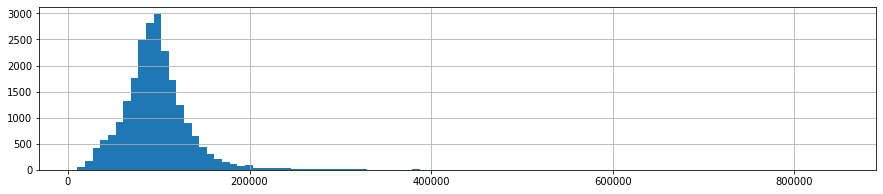

In [81]:
#Гистограмма cost_per_meter
data.cost_per_meter.hist(bins = 100, figsize = (15,3));

In [82]:
#Уберем только 0,05% аномально низких и высоких значений
print('0,05% квантиль cost_per_meter', data['cost_per_meter'].quantile(0.005).round(2))
print('99,5% квантиль cost_per_meter', data['cost_per_meter'].quantile(0.995).round(2))

#Контроль процента общей потери данных относительно изначального количества строк 23699
#После удаления редких значений количество редких значений осталось 22683
#Удалим объекты со стоимостью за метр менее 22 тыс.руб. и 330 тыс.руб. (330 - просто чтобы не выйти за опт.ур.потерь)
print('Общая потеря данных составит: ', ((data.loc[(
                                                    (data['cost_per_meter'] < 22000) |
                                                    (data['cost_per_meter'] > 330000)
                                                   ),
                                                   'cost_per_meter'
                                                  ]
                                              .count() + 23699 - 22683) / 23699)
                                              .round(4)
                                         )

0,05% квантиль cost_per_meter 21485.99
99,5% квантиль cost_per_meter 273236.34
Общая потеря данных составит:  0.0498


In [83]:
#Удаляем строки с аномальными значениями стоимости за 1 кв.м  
data = data[(data['cost_per_meter'] <= 330000) & (data['cost_per_meter'] >= 22000)]

In [84]:
#Вывод общих статистик
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,aggregated_parameter,cost_per_meter
count,22519.000000,2.251900e+04,22519.000000,22519.000000,22519.000000,22519.000000,20748.000000,22519.000000,20453.000000,22519.000000,17369.000000,17389.000000,17390.000000,7625.000000,17390.000000,8578.000000,19545.000000,22519.000000,22519.000000
mean,9.854567,5.821417e+06,57.944578,2.032772,2.691032,10.763489,33.167213,5.919135,10.211448,0.596918,28849.103115,14342.804762,0.594767,493.793180,0.748936,524.633947,175.033819,74.855010,97342.972836
std,5.664435,4.303403e+06,25.585021,0.977085,0.202979,6.515568,16.843134,4.869218,4.577045,0.962163,12701.380522,8548.738412,0.786017,341.275445,0.923176,276.607686,205.618518,27.157283,35146.670103
min,0.000000,8.000000e+05,23.500000,0.000000,2.500000,1.000000,11.200000,1.000000,5.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,28.600000,22051.280000
25%,6.000000,3.490000e+06,40.000000,1.000000,2.600000,5.000000,18.617500,2.000000,7.000000,0.000000,18449.000000,9594.000000,0.000000,290.000000,0.000000,303.000000,45.000000,56.000000,76923.080000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26895.000000,13199.000000,0.000000,456.000000,0.000000,510.000000,94.000000,69.300000,94827.590000
75%,14.000000,6.650000e+06,68.500000,3.000000,2.700000,16.000000,42.000000,8.000000,11.800000,1.000000,37407.000000,16319.000000,1.000000,615.000000,1.000000,734.000000,227.000000,86.960000,113419.570000
max,50.000000,5.400000e+07,214.000000,6.000000,4.800000,27.000000,136.000000,27.000000,40.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1200.000000,245.000000,326363.640000


Вывод: Общая потеря данных не превысила оптимальные 5%

#### Добавление в таблицу нового столбца: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)

In [85]:
data['exp_weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

#### Добавление в таблицу нового столбца: месяц публикации объявления

In [86]:
data['exp_month'] = pd.DatetimeIndex(data['first_day_exposition']).month

#### Добавление в таблицу нового столбца: год публикации объявления

In [87]:
data['exp_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

#### Добавление в таблицу нового столбца: тип этажа квартиры (значения — «первый», «последний», «другой»)

In [89]:
def floor_type_2(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif floor == 0 or floor < 0:
        return 'подвал'
    else:
        return 'другой'
   
data['floor_type'] = data.apply(floor_type_2, axis=1)

#### Добавление в таблицу нового столбца: расстояние в км до центра города

In [90]:
data['cityCenters_nearest_in_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest_in_km'] = data['cityCenters_nearest_in_km'].round()

#### Проверяем результат

In [91]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,aggregated_parameter,cost_per_meter,exp_weekday,exp_month,exp_year,floor_type,cityCenters_nearest_in_km
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,2.0,755.0,NaN,132.0,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,False,...,0.0,NaN,81.0,52.4,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,False,...,2.0,574.0,558.0,65.0,92785.71,3,8,2015,другой,14.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.65,12,14.4,5,False,...,NaN,NaN,55.0,48.4,95065.79,0,9,2018,другой,NaN
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24,NaN,22,False,...,0.0,NaN,NaN,117.6,110544.69,3,4,2019,другой,12.0


### Проведите исследовательский анализ данных

#### Изучение и описание параметров:

        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления

In [92]:
#Изучаем параметры:
data[['total_area', 'living_area', 'kitchen_area', 
      'last_price', 'rooms', 'ceiling_height', 
      'floor', 'floors_total', 'cityCenters_nearest',
      'airports_nearest','parks_nearest']].describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,cityCenters_nearest,airports_nearest,parks_nearest
count,22519.000000,20748.000000,20453.000000,2.251900e+04,22519.000000,22519.000000,22519.000000,22519.000000,17389.000000,17369.000000,7625.000000
mean,57.944578,33.167213,10.211448,5.821417e+06,2.032772,2.691032,5.919135,10.763489,14342.804762,28849.103115,493.793180
std,25.585021,16.843134,4.577045,4.303403e+06,0.977085,0.202979,4.869218,6.515568,8548.738412,12701.380522,341.275445
min,23.500000,11.200000,5.000000,8.000000e+05,0.000000,2.500000,1.000000,1.000000,181.000000,0.000000,1.000000
25%,40.000000,18.617500,7.000000,3.490000e+06,1.000000,2.600000,2.000000,5.000000,9594.000000,18449.000000,290.000000
50%,52.000000,30.000000,9.000000,4.650000e+06,2.000000,2.650000,4.000000,9.000000,13199.000000,26895.000000,456.000000
75%,68.500000,42.000000,11.800000,6.650000e+06,3.000000,2.700000,8.000000,16.000000,16319.000000,37407.000000,615.000000
max,214.000000,136.000000,40.000000,5.400000e+07,6.000000,4.800000,27.000000,27.000000,65968.000000,84869.000000,3190.000000


Вывод:
* ceiling_height - Высота потолков является стандартной для объектов, и в основном колеблется в пределах от 2,6м до 2,7м, но есть отдельные объекты с высотой потолков до 2,6м (минимум - 2,5м) и выше 2,7м (максимум - 4,8м).
* Показатели 'last_price', 'rooms', 'total_area', 'living_area', 'kitchen_area', 'cityCenters_nearest', 'airports_nearest', 'parks_nearest' изучим далее

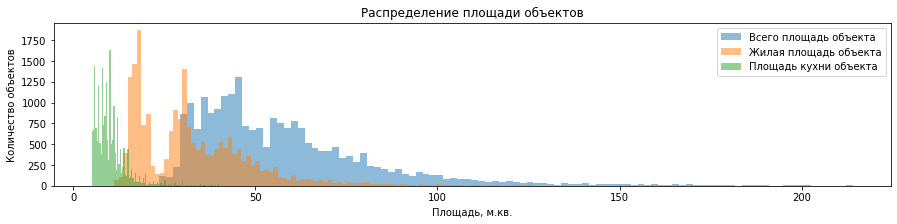

In [93]:
#Изучим подробнее показатели площади объектов. Обрежем графики на значении 150, чтобы не показывать выбросы
fig, ax = plt.subplots()

ax.hist(data['total_area'], bins=100, alpha = 0.5, label = 'Всего площадь объекта')
ax.hist(data['living_area'], bins=100, alpha = 0.5, label = 'Жилая площадь объекта')
ax.hist(data['kitchen_area'], bins=100, alpha = 0.5, label = 'Площадь кухни объекта')

ax.set_title('Распределение площади объектов')
ax.set_xlabel('Площадь, м.кв.')
ax.set_ylabel('Количество объектов')

fig.set_figwidth(15)
fig.set_figheight(3)

plt.legend()

plt.show()

Вывод:
* Площадь объектов в основном лежит в диапазоне от 40 до 69 кв.м 
* Жилая площадь в имеет 2 выраженных пика и провал в примерном диапазоне от 18 до 26. Из-за наличия провала значения медианы, первого и третьего квантиля могут искажать представление о разбросе значений показателя. В основном жилая площадь составляет величину в примерном диапазоне от 15 до 20 кв.м, и от 24 до 50 кв.м. "Провал" в значениях может объяснятся разным количеством комнат. Например, в однокомнатных объектах жилая площадь может лежать в пределах от 15 до 20, а в двухкомнатных и выше - от 24 до 50 кв.м.
* Площадь кухни имеет меньший разброс значений, и в основном колеблется в пределе 7-12 кв.м. Концентрация площадей кухни на узком диапазоне объясняется тем, что площадь кухни незначительно отличается для объектов с разной площадью (т.к. даже для очень большого объекта достаточно одной кухни стандартного размера)

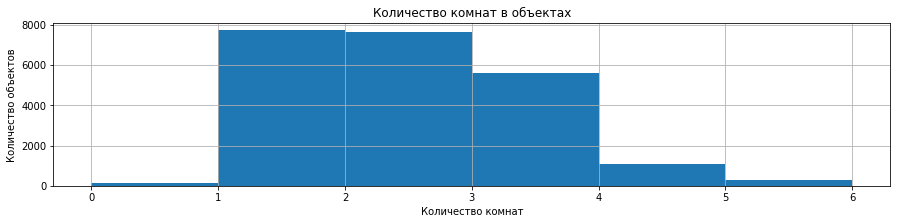

In [94]:
#Изучим подробнее количество комнат в объектах. 
fig, ax = plt.subplots()

ax.hist(data['rooms'], bins=6)

ax.set_title('Количество комнат в объектах')
ax.set_xlabel('Количество комнат')
ax.set_ylabel('Количество объектов')
ax.grid()

fig.set_figwidth(15)
fig.set_figheight(3)

plt.show()


Вывод:
* В основном на продажу выставляются объекты с одной, двумя и тремя комнатами
* Количество объектов без комнат (студии и открытая планировка) и с количеством комнат от 4 и выше составляет менее 1500 объявлений для каждого типа

,rooms,last_price,last_price_k_rub
0,0,3.105128e+06,3105
1,1,3.840300e+06,3840
2,2,5.492806e+06,5492
3,3,7.605117e+06,7605
4,4,1.086853e+07,10868
5,5,1.434817e+07,14348
6,6,1.580986e+07,15809


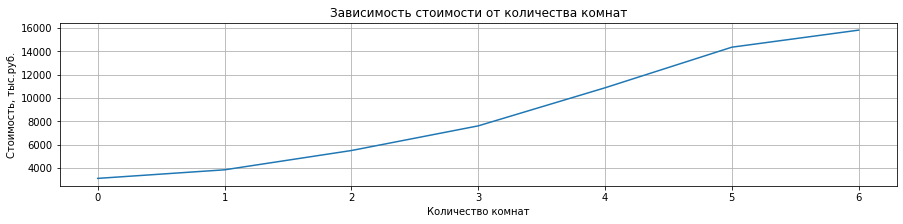

In [95]:
#Создаем таблицу с данными по средней стоимости объекта в разрезе количества комнат
data_last_price_by_rooms = data.groupby('rooms')['last_price'].agg('mean').reset_index()
data_last_price_by_rooms['last_price_k_rub'] = (data_last_price_by_rooms['last_price'] / 1000).astype('int')
display(data_last_price_by_rooms)
#Создаем график зависимости стоимости от количества комнат
x = data_last_price_by_rooms['rooms'] 
y = data_last_price_by_rooms['last_price'] / 1000

fig, ax = plt.subplots()

ax.plot(x, y)

ax.set_title('Зависимость стоимости от количества комнат')
ax.set_xlabel('Количество комнат')
ax.set_ylabel('Стоимость, тыс.руб.')
plt.grid()
fig.set_figwidth(15)
fig.set_figheight(3)

plt.show()

Вывод:
* Средняя стоимость для квартир с количеством комнат до 3х не превышает 8 млн руб.
* Для объектов с количеством комнат более 4х средняя стоимость резко увеличивается. Так, например, разброс средней стоимости между объектами с 2 и 3 комнатами меньше, чем между объектами с 3 и 4 комнатами. Но решающим фактором здесь может быть не количество комнат, а площадь

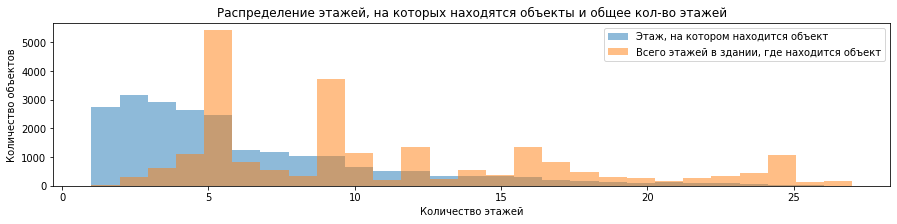

In [96]:
#Изучим подробнее показатели, на каком этаже находится объект и сколько этажей всего в здании, где находится объект.
fig, ax = plt.subplots()

ax.hist(data['floor'], bins=27, alpha = 0.5, label = 'Этаж, на котором находится объект')
ax.hist(data['floors_total'], bins=27, alpha = 0.5, label = 'Всего этажей в здании, где находится объект')

ax.set_title('Распределение этажей, на которых находятся объекты и общее кол-во этажей')
ax.set_xlabel('Количество этажей')
ax.set_ylabel('Количество объектов')

fig.set_figwidth(15)
fig.set_figheight(3)

plt.legend()

plt.show()

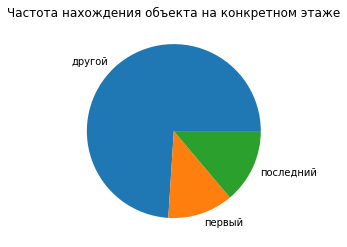

In [97]:
#Изучим подробнее показатели, на каком этаже находится объект и сколько этажей всего в здании, где находится объект.
(
    data.groupby('floor_type')['floor']
        .agg('count')
        .plot(kind='pie', title = 'Частота нахождения объекта на конкретном этаже', ylabel='')
);

Вывод:
* Из гистограммы floors_total видно, что наиболее типовыми домами являются дома с 5ю и 9ю этажами
* Гистограмма floor похожа на распределение Пуассона, и поэтому в отличие от floors_total можно сделать выводы о значениях из данных describe(). В основном продают объекты, расположенные со 2 по 8 этаж
* Из круговой диаграммы видно, что объекты, расположенные не на первом и не на последнем этаже составляют почти 3/4 от генеральной совокупности. Что логично, т.к. здания в основном многоэтажные с количеством этажей больше 3х

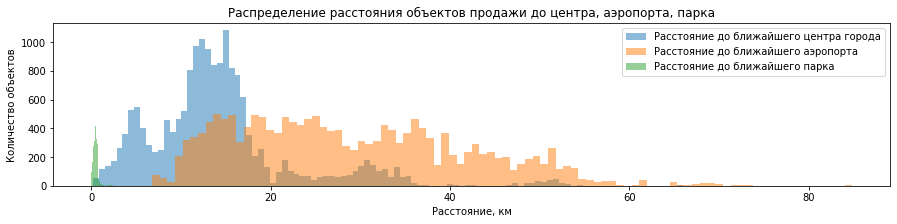

In [98]:
#Изучим подробнее и сопоставим показатели удаленности объектов от парков, центров и аэропортов
fig, ax = plt.subplots()

ax.hist(data['cityCenters_nearest']/1000, bins=100, alpha = 0.5, label = 'Расстояние до ближайшего центра города')
ax.hist(data['airports_nearest']/1000, bins=100, alpha = 0.5, label = 'Расстояние до ближайшего аэропорта')
ax.hist(data['parks_nearest']/1000, bins=100, alpha = 0.5, label = 'Расстояние до ближайшего парка')

ax.set_title('Распределение расстояния объектов продажи до центра, аэропорта, парка')
ax.set_xlabel('Расстояние, км')
ax.set_ylabel('Количество объектов')

fig.set_figwidth(15)
fig.set_figheight(3)

plt.legend()

plt.show()

Вывод:
* На графике почти не видно показатель удаленности от парка, но это логично: скорее всего житель объекта будет готов ехать до центра ближайшего города 20 км, но вряд ли будет готов ехать 20 км до ближайшего парка. Показатель удаленности от парка также может быть ограничен алгоритмом выгрузки расстояния
* В основном ближайший аэропорт находится от 13 км от объекта и больше. Большая удаленность от аэропорта логична, так как не во всех городах есть аэропорт (а международный только один - Пулково)
* Обычно ближайший центр города находится в 10-16 км от объекта
* Обычно ближайший парк (если он есть) находится в 290-615 м от объекта

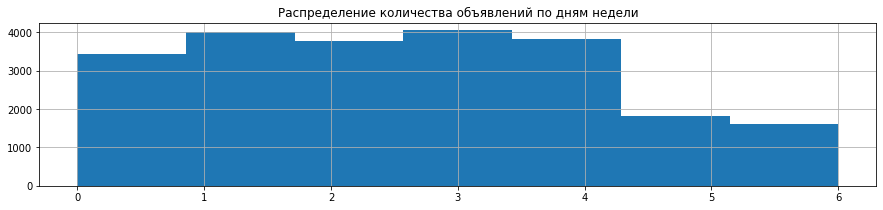

In [99]:
#Изучаем подробнее переменную exp_weekday
data['exp_weekday'].hist(bins=7, figsize=(15,3), legend = False)
plt.title('Распределение количества объявлений по дням недели')
plt.show()

Вывод:
* Больше всего объявлений появляется в понедельник-пятницу. Это может быть связано с тем, что многие пользуются услугами риэлторов, которые могут работать 5/2

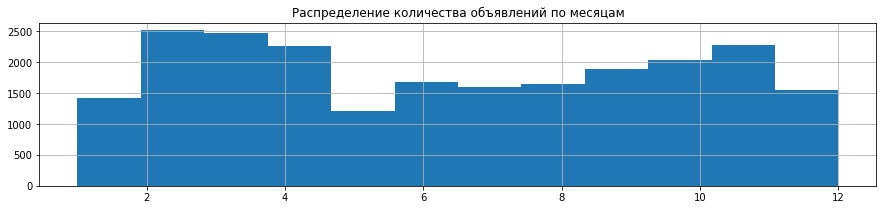

In [100]:
#Изучаем подробнее переменную exp_month
data['exp_month'].hist(bins=12, figsize=(15,3), legend = False)
plt.title('Распределение количества объявлений по месяцам')
plt.show()

Вывод:
* Больше всего объявлений появляется в период с февраля по апрель
* Скорее всего провал в декабре и январе объясняются подготовкой к новогодним праздникам и длинными январскими выходными, а провал в мае и летом объясняется длинными майскими выходными и сезоном отпусков. С период февраль-апрель и сентябрь-ноябрь объем предложений обычно восстанавливается
* Пиковые значения в феврале могут объясняться в том числе последствием получения в декабре "13-х зарплат". Клиенты не спешат с расширением жилья и продажей старого в момент закрытия года (часто горяд дедлайны и т.д.), и отдыхают в январе, а в феврале уже серьезно задумываются о расширении. Также в феврале реже всего берут отпуска, т.к. это самый "невыгодный" для отпусков месяц. В связи с эти появляется больше времени на то, чтобы выложить объявление.

#### Построение гистограммы для каждого параметра

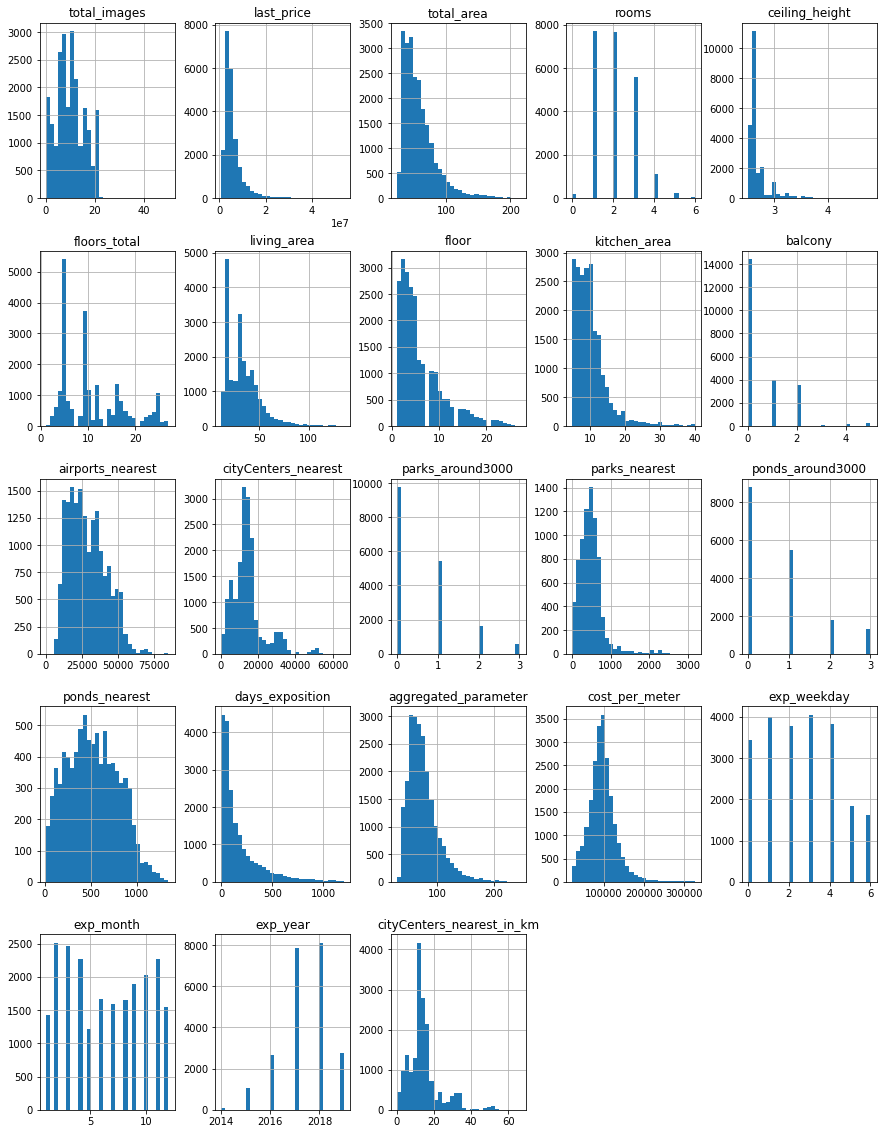

In [101]:
#Выведем гистограммы для всех количественных показателей
data.hist(bins=30, figsize=(15, 20));

#### Задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.

    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"

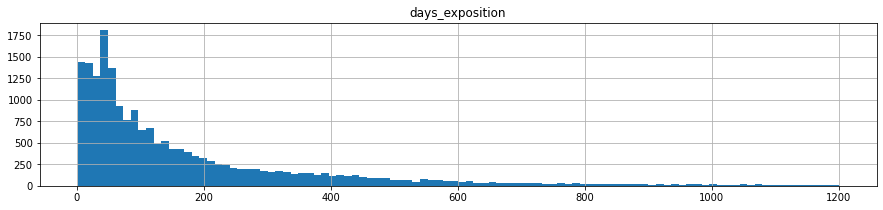

In [102]:
#Строим гистограмму
data.hist('days_exposition', bins = 100, figsize=(15,3));

In [103]:
#Рассчитываем среднее значение и медиану
print('Среднее значение days_exposition:', data['days_exposition'].mean().round(2))
print('1й квантиль days_exposition:', data['days_exposition'].quantile(0.25).round(2))
print('Медиана days_exposition:', data['days_exposition'].median())
print('3й квантиль days_exposition:', data['days_exposition'].quantile(0.75))

Среднее значение days_exposition: 175.03
1й квантиль days_exposition: 45.0
Медиана days_exposition: 94.0
3й квантиль days_exposition: 227.0


<AxesSubplot:>

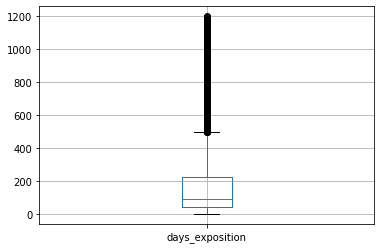

In [104]:
#Чтобы было понятнее статистическое распределение, отобразим диаграмму распределения
data.boxplot('days_exposition')

Вывод: показатель days_exposition похож на распределение Пуассона. 
1. "Обычным" значением days_exposition наиболее справедливо считать значение примерно около 50 дней, т.к. из гистограммы видно, что на эти значения приходится пик количества объявлений. Среднее значение (175,03 дней) является завышенным: на гистрограмме видно, что на значение 175 приходятся не пиковые значения. Медиана тоже оказалась немного завышенной - из гистограммы видно, что значение 94 приходится на стадию спада показателя
2. Необычно долгими продажами можно считать все те продажи, которые лежат за пределами 3-го квантиля, т.е., продажи с количеством дней более 227
3. Необычно быстрыми продажами можно считать продажи, которые лежат в пределах от 0 дней продажи до 1-го квантиля - т.е., до 45 дней.

,exp_year,days_exposition
0,2014,801.813187
1,2015,604.059059
2,2016,320.702901
3,2017,158.147515
4,2018,94.210628
5,2019,30.792871


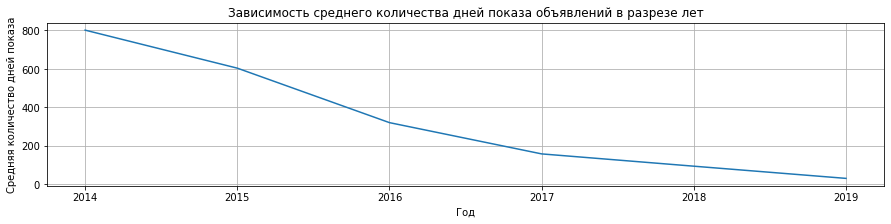

In [105]:
#Исследование средней скорости продаж по годам
mean_days_exp_by_years = data.groupby('exp_year')['days_exposition'].agg('mean').reset_index()
display(mean_days_exp_by_years)

#Создаем график зависимости стоимости от количества комнат

x = mean_days_exp_by_years['exp_year'] 
y = mean_days_exp_by_years['days_exposition']

fig, ax = plt.subplots()

ax.plot(x, y)

ax.set_title('Зависимость среднего количества дней показа объявлений в разрезе лет')
ax.set_xlabel('Год')
ax.set_ylabel('Средняя количество дней показа')
plt.grid()
fig.set_figwidth(15)
fig.set_figheight(3)

plt.show()

Вывод:
    Среднее количество дней показа объявлений снижается с каждым годом. С одной стороны, это логично, т.к. с течением времени непроданные и опубликованные в 2019 году объявления также могут получить такое же время показа, что и объекты в 2014. С другой стороны это может быть связано с ужесточением политики публикации объявлений на Яндес.Недвижимости

,days_exposition,count,percent
44,45.0,820,0.041954
59,60.0,533,0.027270
6,7.0,222,0.011358
29,30.0,203,0.010386
89,90.0,186,0.009517
3,4.0,171,0.008749
2,3.0,152,0.007777
4,5.0,145,0.007419
13,14.0,140,0.007163
19,20.0,134,0.006856


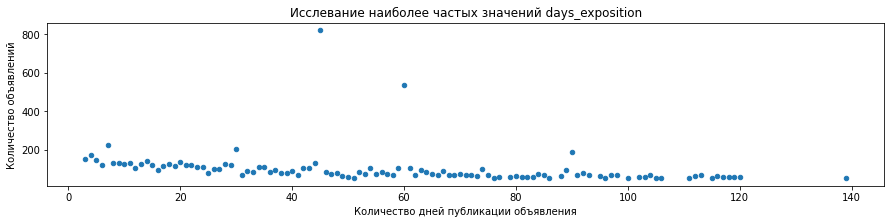

In [106]:
#Исследование моды
moda_days_exp = (
                 data.groupby('days_exposition')['days_exposition']
                     .agg(['count','mean'])
                     .reset_index()
                     .sort_values(by='count', ascending = False)
                )
moda_days_exp = moda_days_exp.drop('mean', axis = 1)
moda_days_exp['percent'] = moda_days_exp['count'] / moda_days_exp['count'].sum()
display(moda_days_exp.head(10))

#Создаем график зависимости стоимости от количества комнат

moda_days_exp[moda_days_exp['count'] > 50].plot(x = 'days_exposition', 
                                                y = 'count', 
                                                kind = 'scatter', 
                                                title = 'Исслевание наиболее частых значений days_exposition',
                                                xlabel = 'Количество дней публикации объявления',
                                                ylabel = 'Количество объявлений',
                                                figsize = (15,3) 
                                               );


Вывод:
Наиболее "популярными" из количества дней показа объявлений являются 7 дней, 30, 45, 60 и 90 дней. Это сроки бесплатной публикации объявления на Яндекс.Недвижимости (см.подробности ниже). Чтобы не платить за публикацию объявления, некоторые клиенты показывают его только предельное количество дней, а потом снимают. Такие объявления составляют примерно 10% от общего числа объявлений

* 7 дней - длительная аренда квартиры
* 30 дней - длительная аренда комнат, участков, гаражей, и посуточная аренда
* 45 дней - продажа комнаты или квартиры стоимостью до 4,5 млн руб
* 60 дней - продажа квартиры стоимостью от 4,5 млн руб до 10 млн руб и коммерческих объектов
* 90 дней - продажа квартиры стоимостью от 10 млн руб, а также продажа участков и гаражей


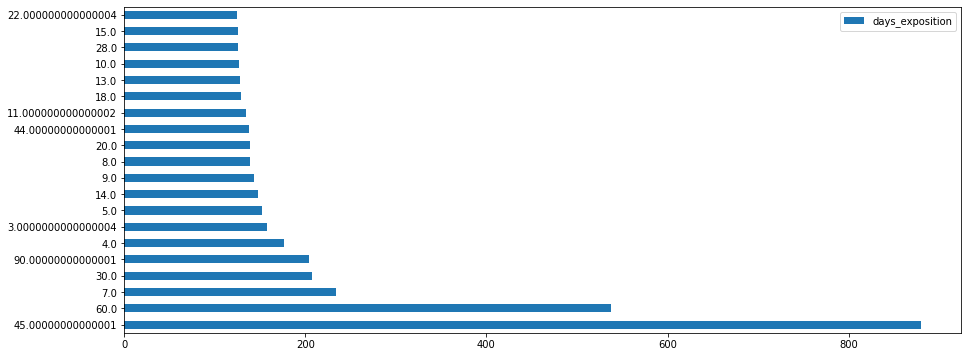

In [107]:
# Моды на реальных данных
df_check = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
    
df_check['days_exposition'].value_counts().to_frame().head(20).plot(kind = 'barh', figsize = (15,6), rot = 0);

#### Задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."

        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);

##### Общее исследование влияния факторов площади, количества комнат, и даты размещения на  стоимость объектов

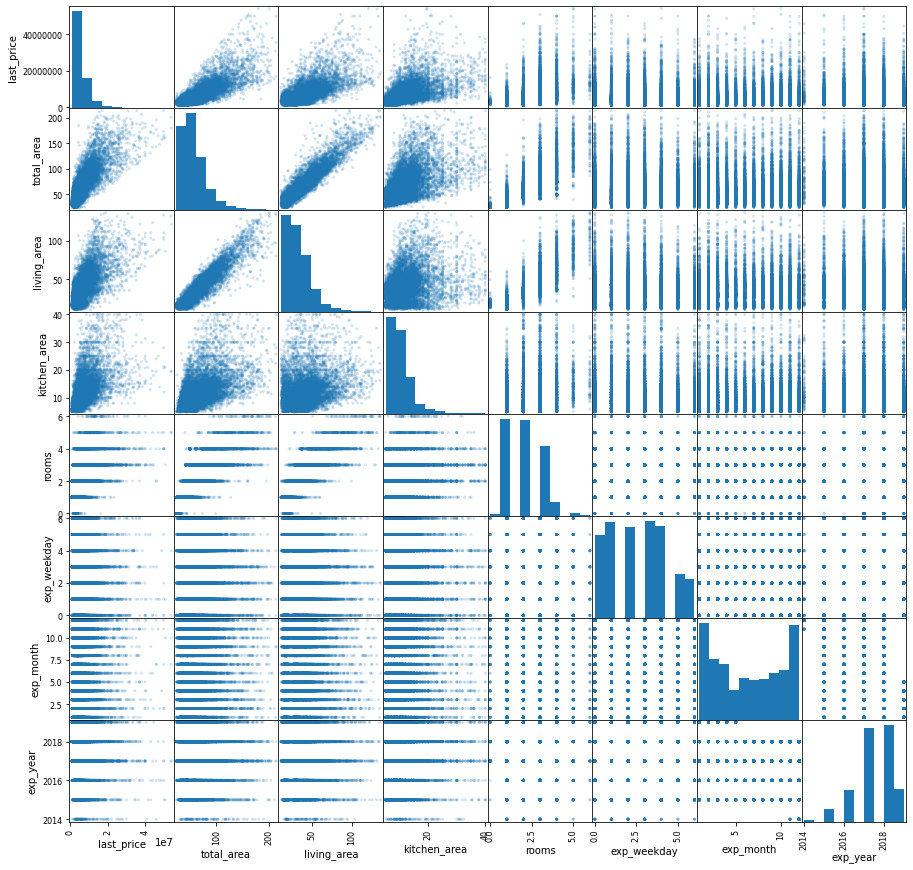

In [108]:
#Краткий анализ scatter графиков
data_for_scatter = data[['last_price', 
                         'total_area', 
                         'living_area', 
                         'kitchen_area', 
                         'rooms',
                         'exp_weekday',
                         'exp_month',
                         'exp_year'
                        ]]
pd.plotting.scatter_matrix(data_for_scatter, alpha = 0.2, figsize = (15, 15));

Вывод: матрица графиков подтверждает, что существует зависимость стоимости от площади. Также видно увеличение стоимости в зависимости от количества комнат и уменьшение стоимости по объектам, выставленным давно

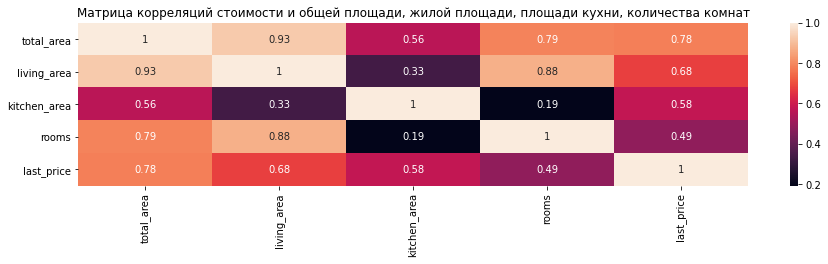

''

In [109]:
#Матрица корреляций стоимости и общей площади, жилой площади, площади кухни, количества комнат
fig, ax = plt.subplots()

sns.heatmap(data[['total_area', 'living_area', 'kitchen_area', 'rooms', 'last_price']].corr(), annot=True)

ax.set_title('Матрица корреляций стоимости и общей площади, жилой площади, площади кухни, количества комнат')

fig.set_figwidth(15)
fig.set_figheight(3)

plt.show()

;

Вывод: из матрицы корреляции видно, что наибольшая корреляция стоимости объекта наблюдается с общей площадью объекта. 

Также наблюдается средняя корреляция с показателем жилой площади и площади кухни, но скорее всего эта связь связана с зависимостью показателей жилой площади и площади кухни от общей площади. Зависимость стоимости от количества комнат слабая, но количество комнат сильно зависит от площади.

Таким образом, из параметров 'total_area', 'living_area', 'kitchen_area', 'rooms', параметром, больше всего влияющим на 'last_price', является 'total_area'. Перепроверим это, построив график зависимости стоимости от общей площади, жилой площади и площади кухни:

##### Исследование влияния фактора площади на стоимость объекта

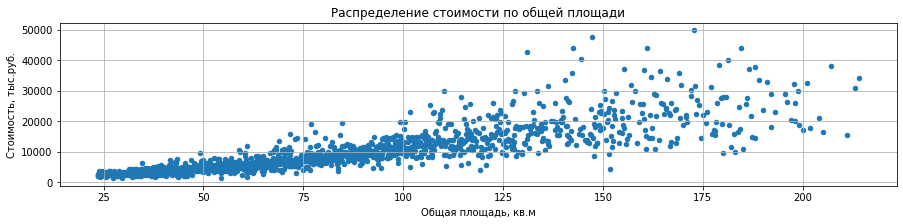

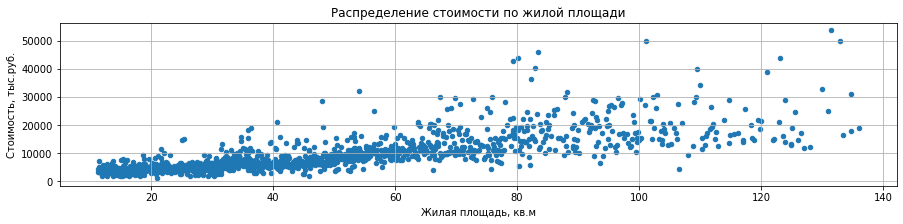

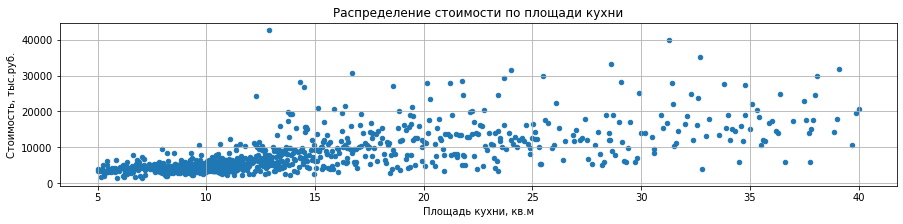

In [110]:
#Создаем промежуточные таблицы, а затем на их основе строим график scatter
data_ttl_area = (data
                 .pivot_table(index='total_area', values='last_price', aggfunc='mean')
                 .reset_index())
data_ttl_area['last_price'] = data_ttl_area['last_price'] / 1000
data_ttl_area.plot(x = 'total_area', 
                   y = 'last_price', 
                   kind = 'scatter', 
                   ylabel='Стоимость, тыс.руб.',
                   xlabel='Общая площадь, кв.м',
                   title = 'Распределение стоимости по общей площади',
                   figsize = (15,3),
                   grid = True
                  )

data_ttl_area = (data
                 .pivot_table(index='living_area', values='last_price', aggfunc='mean')
                 .reset_index())
data_ttl_area['last_price'] = data_ttl_area['last_price'] / 1000
data_ttl_area.plot(x = 'living_area', 
                   y = 'last_price', 
                   kind = 'scatter', 
                   ylabel='Стоимость, тыс.руб.',
                   xlabel='Жилая площадь, кв.м',
                   title = 'Распределение стоимости по жилой площади',
                   figsize = (15,3),
                   grid = True
                  )

data_ttl_area = (data
                 .pivot_table(index='kitchen_area', values='last_price', aggfunc='mean')
                 .reset_index())
data_ttl_area['last_price'] = data_ttl_area['last_price'] / 1000
data_ttl_area.plot(x = 'kitchen_area', 
                   y = 'last_price', 
                   kind = 'scatter', 
                   ylabel='Стоимость, тыс.руб.',
                   xlabel='Площадь кухни, кв.м',
                   title = 'Распределение стоимости по площади кухни',
                   figsize = (15,3),
                   grid = True
                  );

Вывод:
Из графика 'total_area' видно, что с ростом общей площади увеличивается стоимость. На графике распределения по жилой площади увеличение стоимости тоже видно, но оно менее выражено: например, для объектов с жилой площадью 80 кв.м и 100 кв.м стоимость примерно одинакова. На графике 'kitchen_area' видно увеличение стоимости в зависимости от площади кухни, но данная зависимость все-таки больше связана с общим пропорциональным увеличением метража продаваемого объекта 

##### Исследование влияния количества комнат на стоимость объекта

,rooms,mean_last_price,median_last_price
0,0,3105128,2950000.0
1,1,3840299,3600000.0
2,2,5492805,4800000.0
3,3,7605116,6190000.0
4,4,10868534,8750000.0
5,5,14348173,12500000.0
6,6,15809857,13500000.0


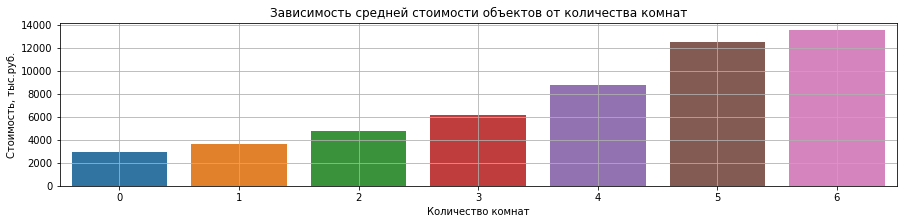

In [111]:
#Отображаем среднюю стоимость объектов с разным количеством комнат
data_by_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc=['mean', 'median']).reset_index()
data_by_rooms.columns = ['rooms', 'mean_last_price', 'median_last_price'] 
data_by_rooms['mean_last_price'] = data_by_rooms['mean_last_price'].astype('int')
display(data_by_rooms)

fig, ax = plt.subplots()

sns.barplot(x=data_by_rooms['rooms'], y=data_by_rooms['median_last_price'] / 1000)
ax.set_title('Зависимость средней стоимости объектов от количества комнат')
ax.set_xlabel('Количество комнат')
ax.set_ylabel('Стоимость, тыс.руб.')
plt.grid()
fig.set_figwidth(15)
fig.set_figheight(3)

plt.show()

,rooms,count,mean_cost_per_meter,median_cost_per_meter
0,0,160,107815,105078.205
1,1,7711,100684,100000.000
2,2,7652,95251,93017.840
3,3,5592,94422,88884.540
4,4,1094,100290,90909.090
5,5,251,102738,91525.420
6,6,59,102780,91033.540


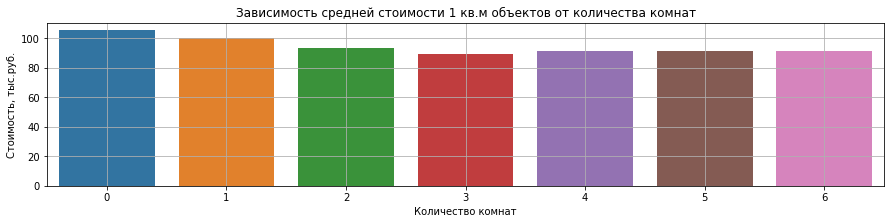

In [112]:
#Отображаем среднюю стоимость 1 кв.м объектов с разным количеством комнат
data_by_rooms = (
                 data.pivot_table(index='rooms', 
                                  values='cost_per_meter', 
                                  aggfunc=['count', 'mean', 'median'])
                     .reset_index()
                )
data_by_rooms.columns = ['rooms', 'count', 'mean_cost_per_meter', 'median_cost_per_meter'] 
data_by_rooms['mean_cost_per_meter'] = data_by_rooms['mean_cost_per_meter'].astype('int')
display(data_by_rooms)

fig, ax = plt.subplots()

sns.barplot(x=data_by_rooms['rooms'], y=data_by_rooms['median_cost_per_meter'] / 1000)
ax.set_title('Зависимость средней стоимости 1 кв.м объектов от количества комнат')
ax.set_xlabel('Количество комнат')
ax.set_ylabel('Стоимость, тыс.руб.')
plt.grid()
fig.set_figwidth(15)
fig.set_figheight(3)

plt.show()

Вывод:
* Стоимость объектов растет с увеличением количества комнат в них, что обусловлено не только количеством комнат, но и тем, что с увеличением комнат растет площадь объектов. 
* При этом медианная стоимость 1 кв.м объектов снижается с каждой следующей комнатой. Это объясняется тем, что, например, двухкомнатная квартира в любом случае будет дороже, так как обладает большей ценностью (площадью), но при этом ввиду того, что на них меньше платежеспособный спрос, стоимость 1 кв.м уменьшается

##### Исследование влияния типа этажа на стоимость объекта

,floor_type,mean_last_price,median_last_price
0,другой,6058725,4800000.0
1,первый,4621767,3980000.0
2,последний,5608037,4350000.0


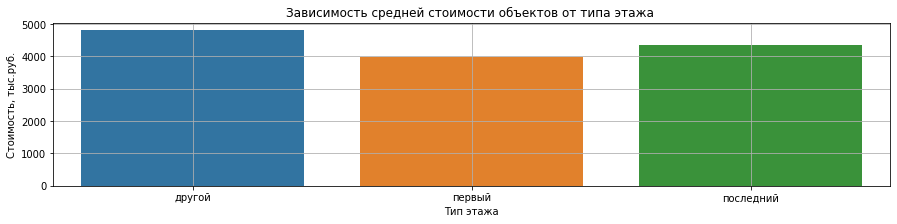

In [113]:
#Отображаем среднюю стоимость объектов, находящихся на разных типах этажей
data_by_floor_type = data.pivot_table(index='floor_type', values='last_price', aggfunc=['mean', 'median']).reset_index()
data_by_floor_type.columns = ['floor_type', 'mean_last_price', 'median_last_price'] 
data_by_floor_type['mean_last_price'] = data_by_floor_type['mean_last_price'].astype('int')
display(data_by_floor_type)

fig, ax = plt.subplots()

sns.barplot(x=data_by_floor_type['floor_type'], y=data_by_floor_type['median_last_price'] / 1000)
ax.set_title('Зависимость средней стоимости объектов от типа этажа ')
ax.set_xlabel('Тип этажа')
ax.set_ylabel('Стоимость, тыс.руб.')
plt.grid()
fig.set_figwidth(15)
fig.set_figheight(3)

plt.show()

Вывод:
Объекты на первых этажах в среднем дешевле всех остальных. Можно сказать, что чем выше этаж - тем больше средняя стоимость объекта, но последний этаж в среднем дешевле, чем "другой", так как таких объектов могут опасаться с точки зрения протечек с крыши.

##### Исследование влияния года публикации на стоимость объекта

Чтобы избавиться от влияния площади на взаимосвязь стоимости объекта и года/месяца/дня недели публикации, в дальнейшем показатели будут сравниваться со стоимостью за 1 кв.м., а не со стоимостью всего объекта

,exp_year,count,mean_cost_per_meter,median_cost_per_meter,median_last_price,median_rooms,median_total_area
0,2014,107,113501.258692,105157.890,6800000.0,3,73.0
1,2015,1056,97639.531875,92003.725,5150000.0,2,59.0
2,2016,2646,95688.642336,91552.430,4550000.0,2,53.0
3,2017,7849,95365.053654,92326.140,4500000.0,2,51.6
4,2018,8115,97019.907097,95820.190,4600000.0,2,50.7
5,2019,2746,104801.684308,103138.430,5050000.0,2,51.7


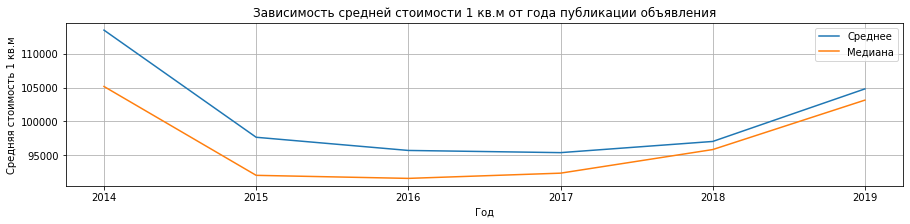

In [114]:
#Отображаем среднюю стоимость одного квадратного метра в зависимости от года размещения объявления
data_cost_by_year = (
                     data.pivot_table(index='exp_year', 
                                      values=['cost_per_meter',  'total_area', 'last_price', 'rooms'], 
                                      aggfunc={'cost_per_meter':['median', 'mean', 'count'], 
                                               'total_area':'median', 
                                               'last_price':'median',
                                               'rooms':'median'
                                              })
                         .reset_index()
                    )

data_cost_by_year.columns = ['exp_year', 
                             'count', 
                             'mean_cost_per_meter', 
                             'median_cost_per_meter', 
                             'median_last_price', 
                             'median_rooms',
                             'median_total_area'
                            ]
display(data_cost_by_year)

fig, ax = plt.subplots()

x = data_cost_by_year['exp_year']
y1 = data_cost_by_year['mean_cost_per_meter']
y2 = data_cost_by_year['median_cost_per_meter']

ax.plot(x, y1, label = 'Среднее')
ax.plot(x, y2, label = 'Медиана')

ax.set_title('Зависимость средней стоимости 1 кв.м от года публикации объявления')
ax.set_xlabel('Год')
ax.set_ylabel('Средняя стоимость 1 кв.м')
plt.grid()
plt.legend()

fig.set_figwidth(15)
fig.set_figheight(3)

plt.show()

Вывод: средняя стоимость 1 кв.м у объектов, размещенных в период 2015-2018 ниже, чем у новых объектов 2019 года. Cреди объектов, размещенных в 2014 стоимость 1 кв.м близка к значению 2019 года (и даже превышает его), но это скорее связано с тем, что это в среднем трехкомнатные квартиры с большой площадью, а не двухкомнатные (самые "популярные" для объявлений 2015-2019 гг). Но объектов 2014 года немного, так что можно считать их аномалией

##### Исследование влияния месяца публикации на стоимость объекта

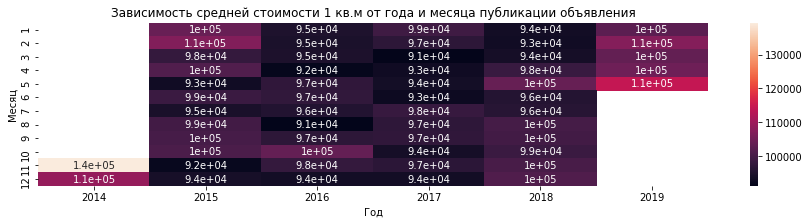

''

In [115]:
#Отображаем среднюю стоимость одного квадратного метра в зависимости от года и месяца размещения объявления
fig, ax = plt.subplots()

sns.heatmap(data.pivot_table(index='exp_month', values='cost_per_meter', columns='exp_year', aggfunc='mean')
            ,annot=True)

ax.set_title('Зависимость средней стоимости 1 кв.м от года и месяца публикации объявления')
ax.set_xlabel('Год')
ax.set_ylabel('Месяц')

fig.set_figwidth(15)
fig.set_figheight(3)

plt.show()
;

,exp_month,count,mean_cost_per_meter,median_cost_per_meter,median_last_price,median_rooms,median_total_area
0,1,1418,97723.115289,95171.005,4600000.0,2,51.900
1,2,2511,97242.784460,95000.000,4650000.0,2,52.700
2,3,2465,97292.603505,95200.000,4650000.0,2,51.100
3,4,2260,98469.596770,95954.975,4800000.0,2,52.155
4,5,1214,97060.770783,92928.570,4515000.0,2,51.670
5,6,1672,95169.317237,92679.495,4400000.0,2,50.700
6,7,1593,96751.005838,94861.660,4650000.0,2,52.000
7,8,1651,98278.166669,95738.200,4600000.0,2,51.800
8,9,1888,98219.111801,95538.555,4700000.0,2,52.000
9,10,2027,96918.710340,94222.220,4600000.0,2,51.200


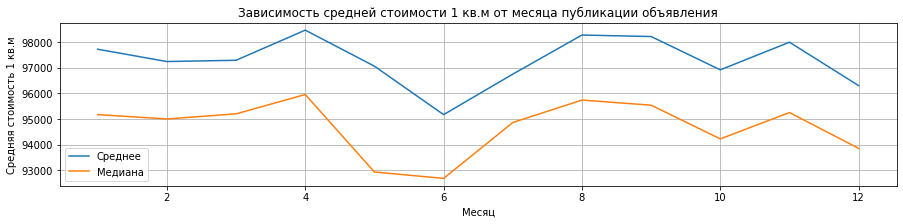

In [116]:
#Отображаем среднюю стоимость одного квадратного метра в зависимости от месяца размещения объявления
data_cost_by_month = (
                      data.pivot_table(index='exp_month', 
                                       values=['cost_per_meter',  'total_area', 'last_price', 'rooms'], 
                                       aggfunc={'cost_per_meter':['median', 'mean', 'count'], 
                                                'total_area':'median', 
                                                'last_price':'median',
                                                'rooms':'median'
                                               })
                          .reset_index()
                     )

data_cost_by_month.columns = ['exp_month', 
                              'count', 
                              'mean_cost_per_meter', 
                              'median_cost_per_meter', 
                              'median_last_price', 
                              'median_rooms',
                              'median_total_area'
                             ]
display(data_cost_by_month)

fig, ax = plt.subplots()

x = data_cost_by_month['exp_month']
y1 = data_cost_by_month['mean_cost_per_meter']
y2 = data_cost_by_month['median_cost_per_meter']

ax.plot(x, y1, label = 'Среднее')
ax.plot(x, y2, label = 'Медиана')

ax.set_title('Зависимость средней стоимости 1 кв.м от месяца публикации объявления')
ax.set_xlabel('Месяц')
ax.set_ylabel('Средняя стоимость 1 кв.м')
plt.grid()
plt.legend()

fig.set_figwidth(15)
fig.set_figheight(3)

plt.show()

Вывод: Средняя и медианная стоимости снижаются в период май-июнь и в конце года, что связано с низким спросом на недвижимость в этот период (в связи с длинными праздниками и сезоном отпусков)

##### Исследование влияния дня недели публикации на стоимость объекта

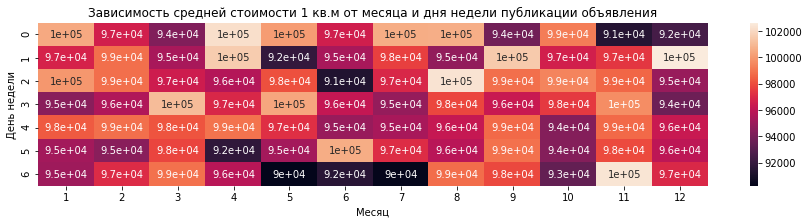

''

In [117]:
#Отображаем среднюю стоимость одного квадратного метра в зависимости от месяца и дня недели размещения объявления
fig, ax = plt.subplots()

sns.heatmap(data.pivot_table(index='exp_weekday', values='cost_per_meter', columns='exp_month', aggfunc='mean')
            ,annot=True)

ax.set_title('Зависимость средней стоимости 1 кв.м от месяца и дня недели публикации объявления')
ax.set_xlabel('Месяц')
ax.set_ylabel('День недели')

fig.set_figwidth(15)
fig.set_figheight(3)

plt.show()
;

,exp_weekday,count,mean_cost_per_meter,median_cost_per_meter,median_last_price,median_rooms,median_total_area
0,0,3437,97535.709113,94318.180,4650000.0,2,52.1
1,1,3997,97752.068727,95384.620,4750000.0,2,52.0
2,2,3769,97818.401605,95478.720,4700000.0,2,52.4
3,3,4048,97162.052359,94869.855,4600000.0,2,52.0
4,4,3829,97360.641251,94488.190,4590000.0,2,51.0
5,5,1831,96397.361420,93641.500,4600000.0,2,50.4
6,6,1608,96289.892201,94425.015,4550000.0,2,52.0


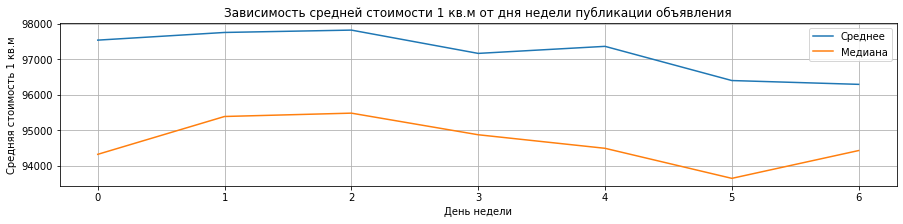

In [118]:
#Отображаем среднюю стоимость одного квадратного метра в зависимости от дня недели размещения объявления
data_cost_by_weekday = (
                        data.pivot_table(index='exp_weekday', 
                                         values=['cost_per_meter',  'total_area', 'last_price', 'rooms'], 
                                         aggfunc={'cost_per_meter':['median', 'mean', 'count'], 
                                                  'total_area':'median', 
                                                  'last_price':'median',
                                                  'rooms':'median'
                                                 })
                            .reset_index()
                       )

data_cost_by_weekday.columns = ['exp_weekday', 
                                'count', 
                                'mean_cost_per_meter', 
                                'median_cost_per_meter', 
                                'median_last_price', 
                                'median_rooms',
                                'median_total_area'
                               ]
display(data_cost_by_weekday)

fig, ax = plt.subplots()

x = data_cost_by_weekday['exp_weekday']
y1 = data_cost_by_weekday['mean_cost_per_meter']
y2 = data_cost_by_weekday['median_cost_per_meter']

ax.plot(x, y1, label = 'Среднее')
ax.plot(x, y2, label = 'Медиана')

ax.set_title('Зависимость средней стоимости 1 кв.м от дня недели публикации объявления')
ax.set_xlabel('День недели')
ax.set_ylabel('Средняя стоимость 1 кв.м')
plt.grid()
plt.legend()

fig.set_figwidth(15)
fig.set_figheight(3)

plt.show()

Вывод: в среднем стоимость 1 кв.м объектов, размещаемых с четверга по понедельник, ниже, чем стоимость 1 кв.м объектов, размещаемых со вторника по среду. 
Возможно, это связано с более активной работой риелторов в эти дни, либо именно в эти дни наиболее охотно выставляют на продажу дорогие объекты. 
При этом разница между медианной стоимостью объектов, размещаемых во вторник (самый "дорогой" день недели), не более чем на 2% выше, чем стоимость объектов, размещаемых в субботу (самый "дешевый" день недели).
В связи с этим на данную взаимосвязь лучше не опираться в дальнейшем при построении модели.

#### Задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."

In [119]:
#Создаем таблицу со средними ценами за кв метр по 10 городам с наибольшим количеством объявлений
top_locality_name = data.groupby('locality_name'
                     )['cost_per_meter'].agg(['count', 'mean']
                     ).sort_values(by='count', ascending=False
                     ).round(2
                     ).head(10)
                    
display(top_locality_name)
print('Населенный пункт с минимальной средней стоимостью квадратного метра:', 
      top_locality_name[top_locality_name['mean'] == top_locality_name['mean'].min()].index[0])
print('Населенный пункт с максимальной средней стоимостью квадратного метра:', 
      top_locality_name[top_locality_name['mean'] == top_locality_name['mean'].max()].index[0])


,count,mean
locality_name,,
Санкт-Петербург,15004,110919.56
поселок Мурино,526,85129.57
поселок Шушары,429,78114.18
Всеволожск,390,67287.48
Пушкин,352,102948.08
Колпино,335,75258.55
поселок Парголово,312,90089.49
Гатчина,299,69405.05
деревня Кудрово,293,92287.45


Населенный пункт с минимальной средней стоимостью квадратного метра: Выборг
Населенный пункт с максимальной средней стоимостью квадратного метра: Санкт-Петербург


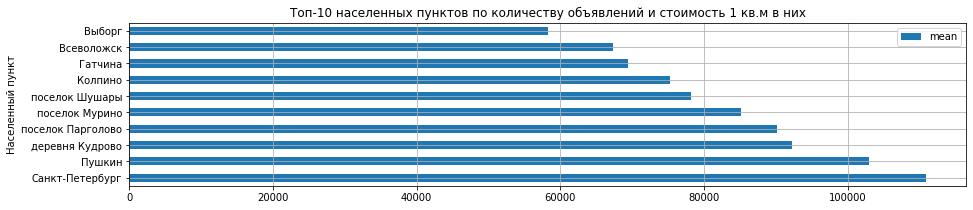

In [120]:
#Вывод гистограммы
(
    top_locality_name
    .sort_values(by='mean', ascending=False)
    .plot(kind = 'barh', 
          y = 'mean', 
          ylabel = 'Средняя стоимость кв.м', 
          xlabel = 'Населенный пункт', 
          figsize = (15,3),
          grid = True
         )
    .set_title('Топ-10 населенных пунктов по количеству объявлений и стоимость 1 кв.м в них')
)

plt.show()

#### Задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."

,cityCenters_nearest_in_km,count,mean_cost,mean_fl_ttl,count_other,count_first,count_last,percent_other,percent_first,percent_last
0,0.0,16,125329.14,4.94,11.0,2.0,3.0,0.687500,0.125000,0.187500
1,1.0,155,133524.64,4.58,98.0,19.0,38.0,0.632258,0.122581,0.245161
2,2.0,261,130177.37,4.82,150.0,43.0,68.0,0.574713,0.164751,0.260536
3,3.0,324,117563.42,5.19,198.0,53.0,73.0,0.611111,0.163580,0.225309
4,4.0,631,126585.79,6.76,451.0,74.0,106.0,0.714739,0.117274,0.167987
5,5.0,817,133221.13,7.74,621.0,74.0,122.0,0.760098,0.090575,0.149327
6,6.0,543,137223.06,7.95,404.0,61.0,78.0,0.744015,0.112339,0.143646
7,7.0,374,137364.47,9.70,291.0,29.0,54.0,0.778075,0.077540,0.144385
8,8.0,566,123573.87,10.94,453.0,49.0,64.0,0.800353,0.086572,0.113074
9,9.0,578,113252.00,10.47,443.0,52.0,83.0,0.766436,0.089965,0.143599


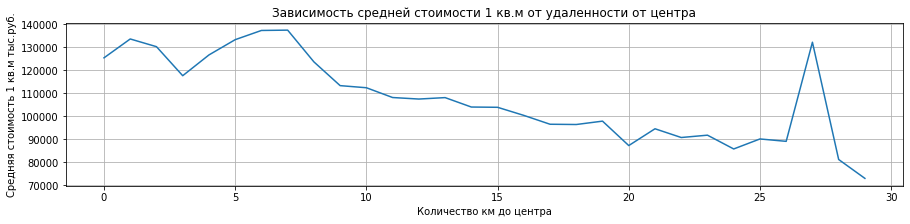

In [121]:
#Создаем таблицу, в которой рассчитаем среднюю стоимость 1 кв.м в разрезе км от центра, количества предложений
#И типа этажа, на котором расположен объект
avg_cost_per_meter_km = (data[data['locality_name'] == 'Санкт-Петербург']
                         .pivot_table(index='cityCenters_nearest_in_km', 
                                      values=['cost_per_meter', 'floors_total'], 
                                      aggfunc={'cost_per_meter' : ['mean','count'], 'floors_total': 'mean'})
                         .reset_index()
                         .round(2)
                        )
avg_cost_per_meter_km.columns = ['cityCenters_nearest_in_km', 'count', 'mean_cost', 'mean_fl_ttl'] 

avg_cost_per_meter_km_floor_type = (data[data['locality_name'] == 'Санкт-Петербург']
                                    .pivot_table(index='cityCenters_nearest_in_km', 
                                                 values='cost_per_meter', 
                                                 columns='floor_type',
                                                 aggfunc=['count'])
                                    .reset_index()
                                    .round(2)
                                   )
avg_cost_per_meter_km_floor_type.columns = ['cityCenters_nearest_in_km', 'count_other', 'count_first', 'count_last']

#Объединяем таблицы. Индексы у них совпадают, поэтому можно обойтись простым способом
avg_cost_per_meter_km['count_other'] = avg_cost_per_meter_km_floor_type['count_other']
avg_cost_per_meter_km['count_first'] = avg_cost_per_meter_km_floor_type['count_first']
avg_cost_per_meter_km['count_last'] = avg_cost_per_meter_km_floor_type['count_last']
avg_cost_per_meter_km['percent_other'] = avg_cost_per_meter_km['count_other'] / avg_cost_per_meter_km['count']
avg_cost_per_meter_km['percent_first'] = avg_cost_per_meter_km['count_first'] / avg_cost_per_meter_km['count']
avg_cost_per_meter_km['percent_last'] = avg_cost_per_meter_km['count_last'] / avg_cost_per_meter_km['count']

display(avg_cost_per_meter_km)

#Создаем график зависимости стоимости от количества комнат
x = avg_cost_per_meter_km['cityCenters_nearest_in_km'] 
y = avg_cost_per_meter_km['mean_cost']

fig, ax = plt.subplots()

ax.plot(x, y)

ax.set_title('Зависимость средней стоимости 1 кв.м от удаленности от центра')
ax.set_xlabel('Количество км до центра')
ax.set_ylabel('Средняя стоимость 1 кв.м тыс.руб.')
plt.grid()
fig.set_figwidth(15)
fig.set_figheight(3)

plt.show()

Вывод: По мере удаления от центра стоимость 1 кв.м снижается

* 0 км: Самые дорогие квартиры, и их немного. Это невысокие 5-этажные дома в туристическом центре (т.е., шумном районе), поэтому цены на них высоки, но немного ниже, чем на объекты, находящиеся в небольшом удалении от центра 
* 1-2 км: В квартирах, которые находятся в 1-2 км от центра, средняя стоимость 1 кв.м стоит почти на 5-8 тысяч дороже, чем квартиры в центре. От центра такие объекты все также недалеко, но туристов меньше.
* 3-5 км: На расстоянии 3 км наблюдается резкий спад стоимости, после чего от 4 до 7 км наблюдается резкий рост стоимости. На расстоянии 4-7 км средняя высота дома уже 7-8 этажей, и это дома более новой постройки (центральные дома Санкт-Петербурга известны неудовлетворительным состоянием коммуникаций). Соответственно, выбирая между старым домом в 3км и более новым домом в 4км от центра, логично, что дома в 4км предпочтительнее. В новых домах также больше квартир не на первых этажах. Дома, которые расположены в 5 км от центра также обладают лучшей инфраструктурой, т.к. ближе в большим торговым центрам.
* 7-29 км (кроме 20-го км и 27-км) : Стоимость 1 кв.м постепенно снижается по мере удаления от центра города
* 20 км и 27 км: Резкий провал на 20 км и резкий рост на 27-м обусловлены малым количеством предложений (всего 19 на 20м км и 2 на 27м)

### Общий вывод

В ходе исследования были рассмотрены данные Яндекс.Недвижимости. По результатам выявлены следующие инсайты:

1. Общее описание параметров генеральной совокупности

Наиболее типовыми объектами для генеральной совокупности являются объекты с 1-3 комнатами, общей площадью от 40 до 69 кв.м, с высотой потолков в среднем 2,65 м, медианной стоимостью около 4,65 млн руб, в доме типовой постройки с 5 или 9 этажами, и находящимися в среднем не на первом и не на последнем этаже. 
В основном ближайший аэропорт находится от 18-37 км от объекта, ближайший центр города - в 9-16 км от объекта, а ближайший парк - в 290-615 метрах.
Больше всего объявлений появляется в понедельник-пятницу и в период с февраля по апрель и с сентября по ноябрь.

2. Как быстро продавались квартиры

Медианным значением срока, за который была продана квартира, является 94 дней, но наиболее часто встречающимся значением срока продажи квартиры является срок, примерно равный 50 дням. 
В дальнейшем для построения автоматизированной системы по выявлению мошенников можно отметить в качестве факторов слишком быструю продажу квартиры - менее 45 дней, либо слишком долгую - более 227 дней.
Среднее количество дней показа объявлений снижается с каждым годом, что может быть связано как с ужесточением политики публикации объявлений на Яндекс.Недвижимости, так и с тем, что с течением времени непроданные и опубликованные в 2019 году объявления также могут получить такое же время показа, что и объекты в 2014.

3. Факторы, которые больше всего влияют на стоимость объекта:
  * Выявлена корреляция стоимости объекта с общей площадью объекта, что позволяет включить параметр "площадь объекта" в будущую систему по выявлению мошенников. Предположительными мошенническими объявлениями могут быть объекты, выбивающиеся из общего тренда - например, объекты с большой площадью, но относительно низкой стоимостью.
  * Также была выявлена более слабая связь с показателями жилой площади и площади кухни, но скорее всего эта связь связана с зависимостью показателей жилой площади и площади кухни от общей площади. Зависимость стоимости от количества комнат слабая, но количество комнат сильно зависит от площади.
  * Стоимость объектов растет с увеличением количества комнат в них, но при этом медианная стоимость 1 кв.м объектов снижается с каждой следующей комнатой. Это объясняется тем, что, например, двухкомнатная квартира будет дороже, так как обладает большей ценностью (площадью), но при этом ввиду того, что на них меньше платежеспособный спрос, стоимость 1 кв.м уменьшается. Фактор стоимости 1 кв.м для объекта с Х количеством комнат можно включить в будущую систему по выявлению мошенников.
  * Объекты на первых этажах в среднем дешевле всех остальных. Можно сказать, что чем выше этаж - тем больше средняя стоимость объекта, но последний этаж обычно дешевле, чем "другой" (не первый и не последний). Параметр типа этажа можно использовать для построения системы по выявлению мошенников: объекты, которые находятся на последних этажах, но имеют стоимость более низкую, чем на нижних этажах, являются подозрительными.
  * Стоимость объекта зависит от параметра "год размещения объявления". Чем дольше "висит" объявление, тем стоимость объекта ниже. Данный показатель можно использовать в дальнейшем для построения системы по выявлению мошенников. 
  * Стоимость объектов снижается в период май-июнь и в конце года, что связано с низким спросом на недвижимость в этот период (в связи с длинными праздниками и сезоном отпусков). Данный показатель можно использовать в дальнейшем для построения системы по выявлению мошенников.
  * Выявлено, что в среднем стоимость 1 кв.м объектов, размещаемых с четверга по понедельник, ниже, чем стоимость 1 кв.м объектов, размещаемых со вторника по среду. При этом разница между медианной стоимостью объектов, размещаемых во вторник (самый "дорогой" день недели), не более чем на 2% выше, чем стоимость объектов, размещаемых в субботу (самый "дешевый" день недели). В связи с этим на данную взаимосвязь лучше не опираться в дальнейшем при построении модели.
  

4. Средняя стоимость 1 кв.м в 10 самых популярных населенных пунктах

Наиболее популярными населенными пунктами являются: Санкт-Петербург, поселок Мурино, поселок Шушары, Всеволожск, Пушкин, Колпино, поселок Парголово, Гатчина, деревня Кудрово, Выборг.
Из них самая высокая стоимость кв.м наблюдается в г. Санкт-Петербург - 110919.56 руб/м,
а самая низкая - в г.Выборг, 58285.17 руб/м.
При построении автоматизированной системы по выявлению мошенников можно рассчитать среднюю стоимость кв.м, стандартное отклонение, и отмечать как гипотетических мошенников объекты, стоимость 1 кв.м по которым меньше средней минус ст.откл.


5. Как расстояние от центра города влияет на стоимость 1 кв.м

Стоимость 1 кв.м высока в центре (в пределах от 0 до 2х км), но проваливается на 3-м км от центра (т.к. этот район проигрывает по близости к центру и близости к инфраструктуре, а также состоит из старых домов), достигает пика к 7-му км от центра и в дальнейшем уменьшается по мере удаления от центра города, но возможны и выбросы (например, элитные поселки). 
При построении автоматизированной системы по выявлению мошенников в качестве одного из подозрительных факторов можно отметить объекты, стоимость 1 кв.м которых превышает или составляет величину меньшую, чем средняя для данного км +/- ст.откл. 